In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load dataset
data = pd.read_csv('ai4i2020.csv')
# Display first 5 rows
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
import pandas as pd

# 1) Load your dataset
df = pd.read_csv("ai4i2020.csv")

# 2) Make sure the column names match the ones with units
rename_map = {
    "AirTemp": "Air temperature [K]",
    "ProcessTemp": "Process temperature [K]",
    "RotationalSpeed": "Rotational speed [rpm]",
    "Torque": "Torque [Nm]",
    "ToolWear": "Tool wear [min]",
}
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# 3) Pick columns and take first 5 rows
cols = [
    "UDI", "Product ID", "Type",
    "Air temperature [K]", "Process temperature [K]",
    "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]",
    "Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"
]
cols = [c for c in cols if c in df.columns]   # keep only those that exist
table5 = df.loc[:4, cols]

# 4) Save for Word
table5.to_csv("table_head_5.csv", index=False)     # file you can open/paste
table5.to_clipboard(index=False)                   # copies as a tabbed table
table5


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# General info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
# Check shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset has 10000 rows and 14 columns.


In [6]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [7]:
# Check if 'Product ID' is unique
is_unique = data['Product ID'].nunique() == data.shape[0]
print(f"Are all Product IDs unique? {is_unique}")

Are all Product IDs unique? True


In [8]:
data.rename(columns={
    'Air temperature [K]': 'AirTemp',
    'Process temperature [K]': 'ProcessTemp',
    'Rotational speed [rpm]': 'RotationalSpeed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'ToolWear'
}, inplace=True)


In [9]:
# Describe numerical features
data.describe()


,UDI,AirTemp,ProcessTemp,RotationalSpeed,Torque,ToolWear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
# Count how many failure vs non-failure instances
data['Machine failure'].value_counts()


Machine failure
0    9661
1     339
Name: count, dtype: int64

In [11]:
failure_rate= data['Machine failure'].mean()
print(f"Machine failure Rate: {failure_rate:.2%}")

Machine failure Rate: 3.39%


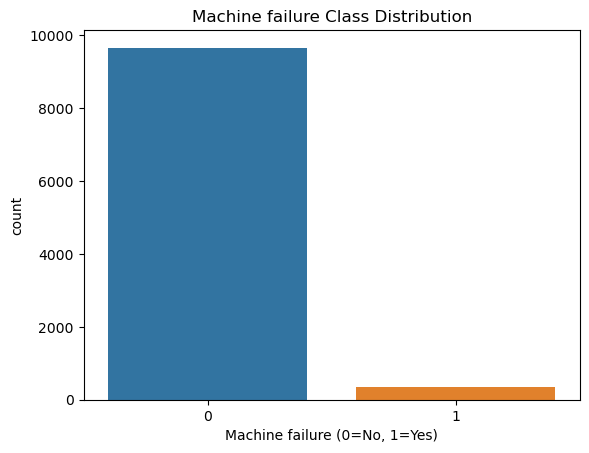

In [12]:
sns.countplot(x='Machine failure', data=data)
plt.title('Machine failure Class Distribution')
plt.xlabel('Machine failure (0=No, 1=Yes)')
plt.ylabel('count')
plt.show()


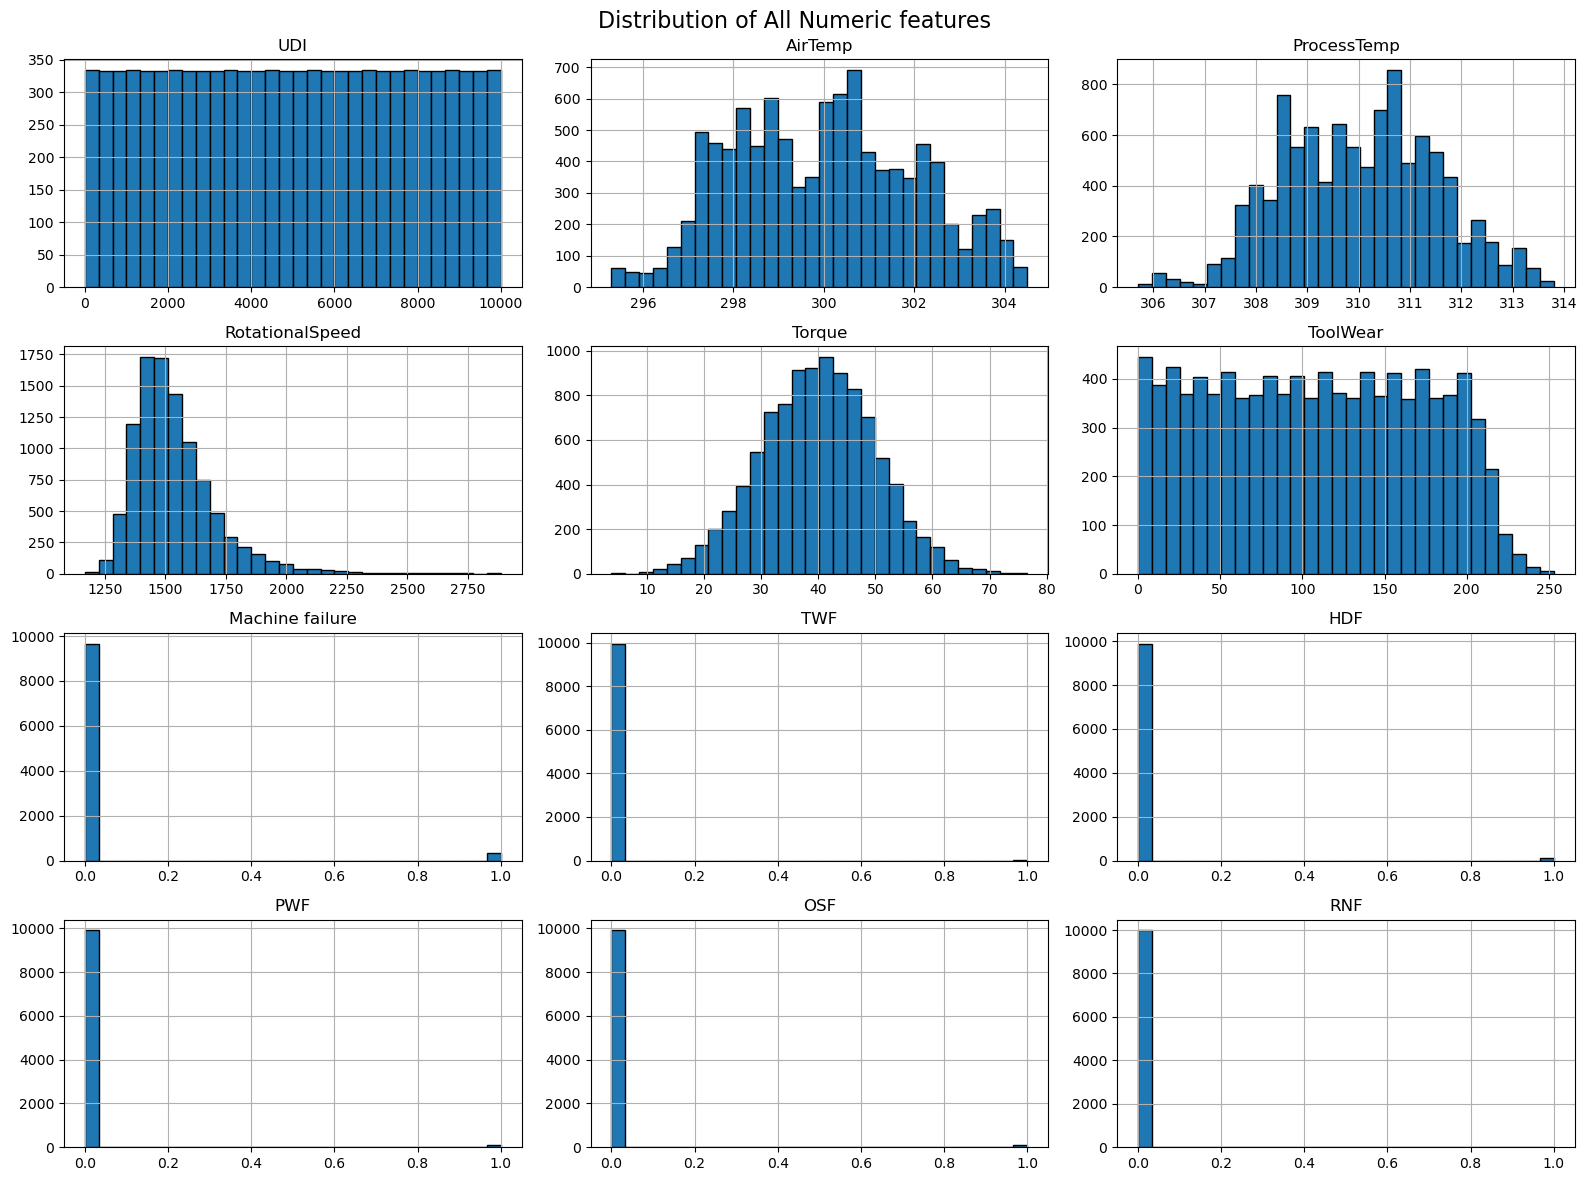

In [13]:
data.hist(figsize=(16,12), bins=30, edgecolor='black')
plt.suptitle('Distribution of All Numeric features', fontsize=16)
plt.tight_layout()
plt.show()

saved -> C:\Users\Ayushi singh\Predictive Mainetenance Analysis using Machine Learning\eda_hist_continuous.png


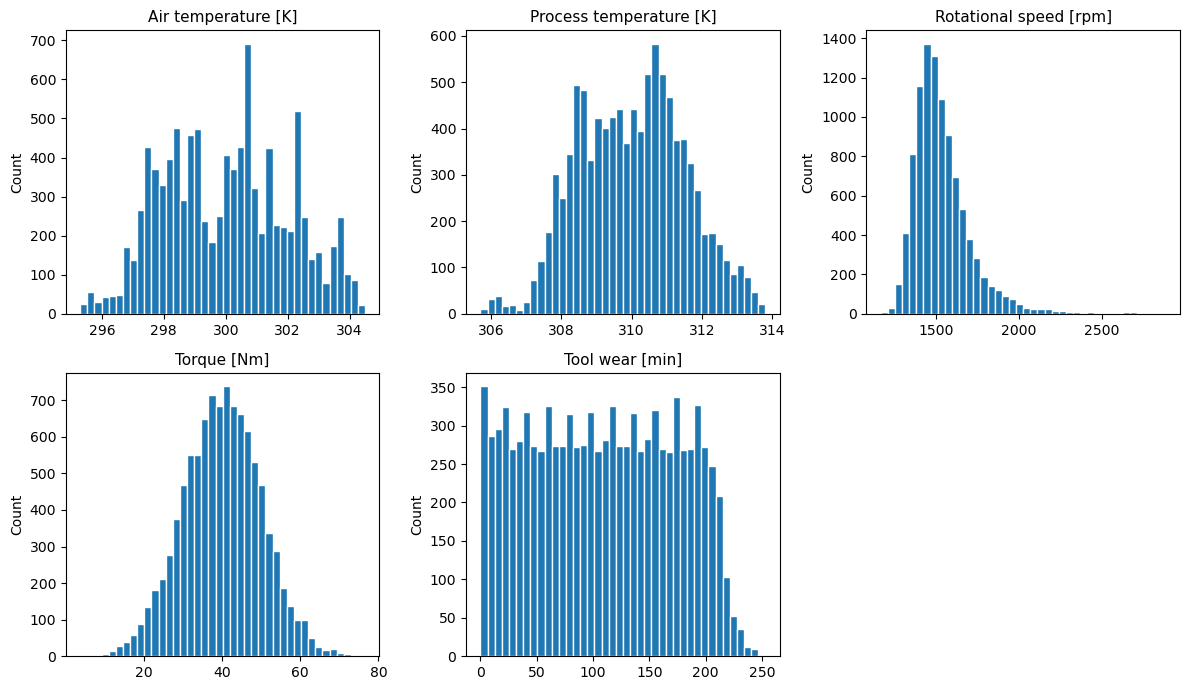

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- load data ---
df = pd.read_csv("ai4i2020.csv")  # change path if needed

# Use whatever column names you actually have.
# Try official AI4I names first; fall back to your shorter names.
candidates = [
    ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"],
    ["AirTemp", "ProcessTemp", "RotationalSpeed", "Torque", "ToolWear"],
]
for cols in candidates:
    if all(c in df.columns for c in cols):
        CONT_COLS = cols
        break
else:
    raise ValueError("Couldn't find expected column names. Print df.columns and adjust CONT_COLS.")

# --- plot 5 histograms in a 2x3 grid (last panel blank) ---
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes = axes.ravel()

for i, col in enumerate(CONT_COLS):
    axes[i].hist(df[col].dropna(), bins=40, edgecolor="white")
    axes[i].set_title(col, fontsize=11)
    axes[i].set_ylabel("Count")
    axes[i].grid(False)

# hide the unused 6th panel
axes[-1].axis("off")

plt.tight_layout()
out = Path("eda_hist_continuous.png")
plt.savefig(out, dpi=300, bbox_inches="tight")
print("saved ->", out.resolve())


In [15]:
data.skew(numeric_only=True), data.kurt(numeric_only=True)


(UDI                 0.000000
 AirTemp             0.114274
 ProcessTemp         0.015027
 RotationalSpeed     1.993171
 Torque             -0.009517
 ToolWear            0.027292
 Machine failure     5.151852
 TWF                14.644462
 HDF                 9.164789
 PWF                10.114516
 OSF                 9.953916
 RNF                22.879570
 dtype: float64,
 UDI                 -1.200000
 AirTemp             -0.835962
 ProcessTemp         -0.499734
 RotationalSpeed      7.392945
 Torque              -0.013241
 ToolWear            -1.166737
 Machine failure     24.546486
 TWF                212.502762
 HDF                 82.009755
 PWF                100.323504
 OSF                 97.099856
 RNF                521.579046
 dtype: float64)

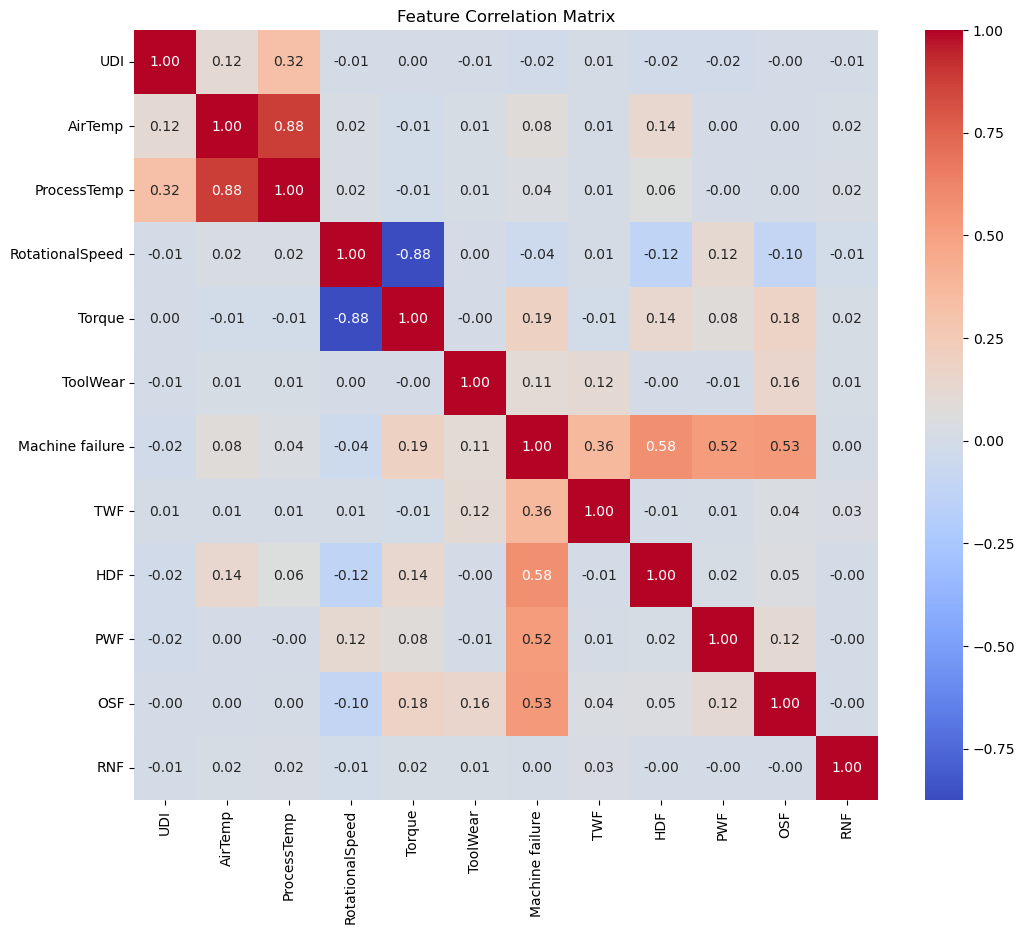

In [16]:
plt.figure(figsize=(12,10))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

C:\Users\Ayushi singh\AppData\Local\Temp\ipykernel_28504\1020634094.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


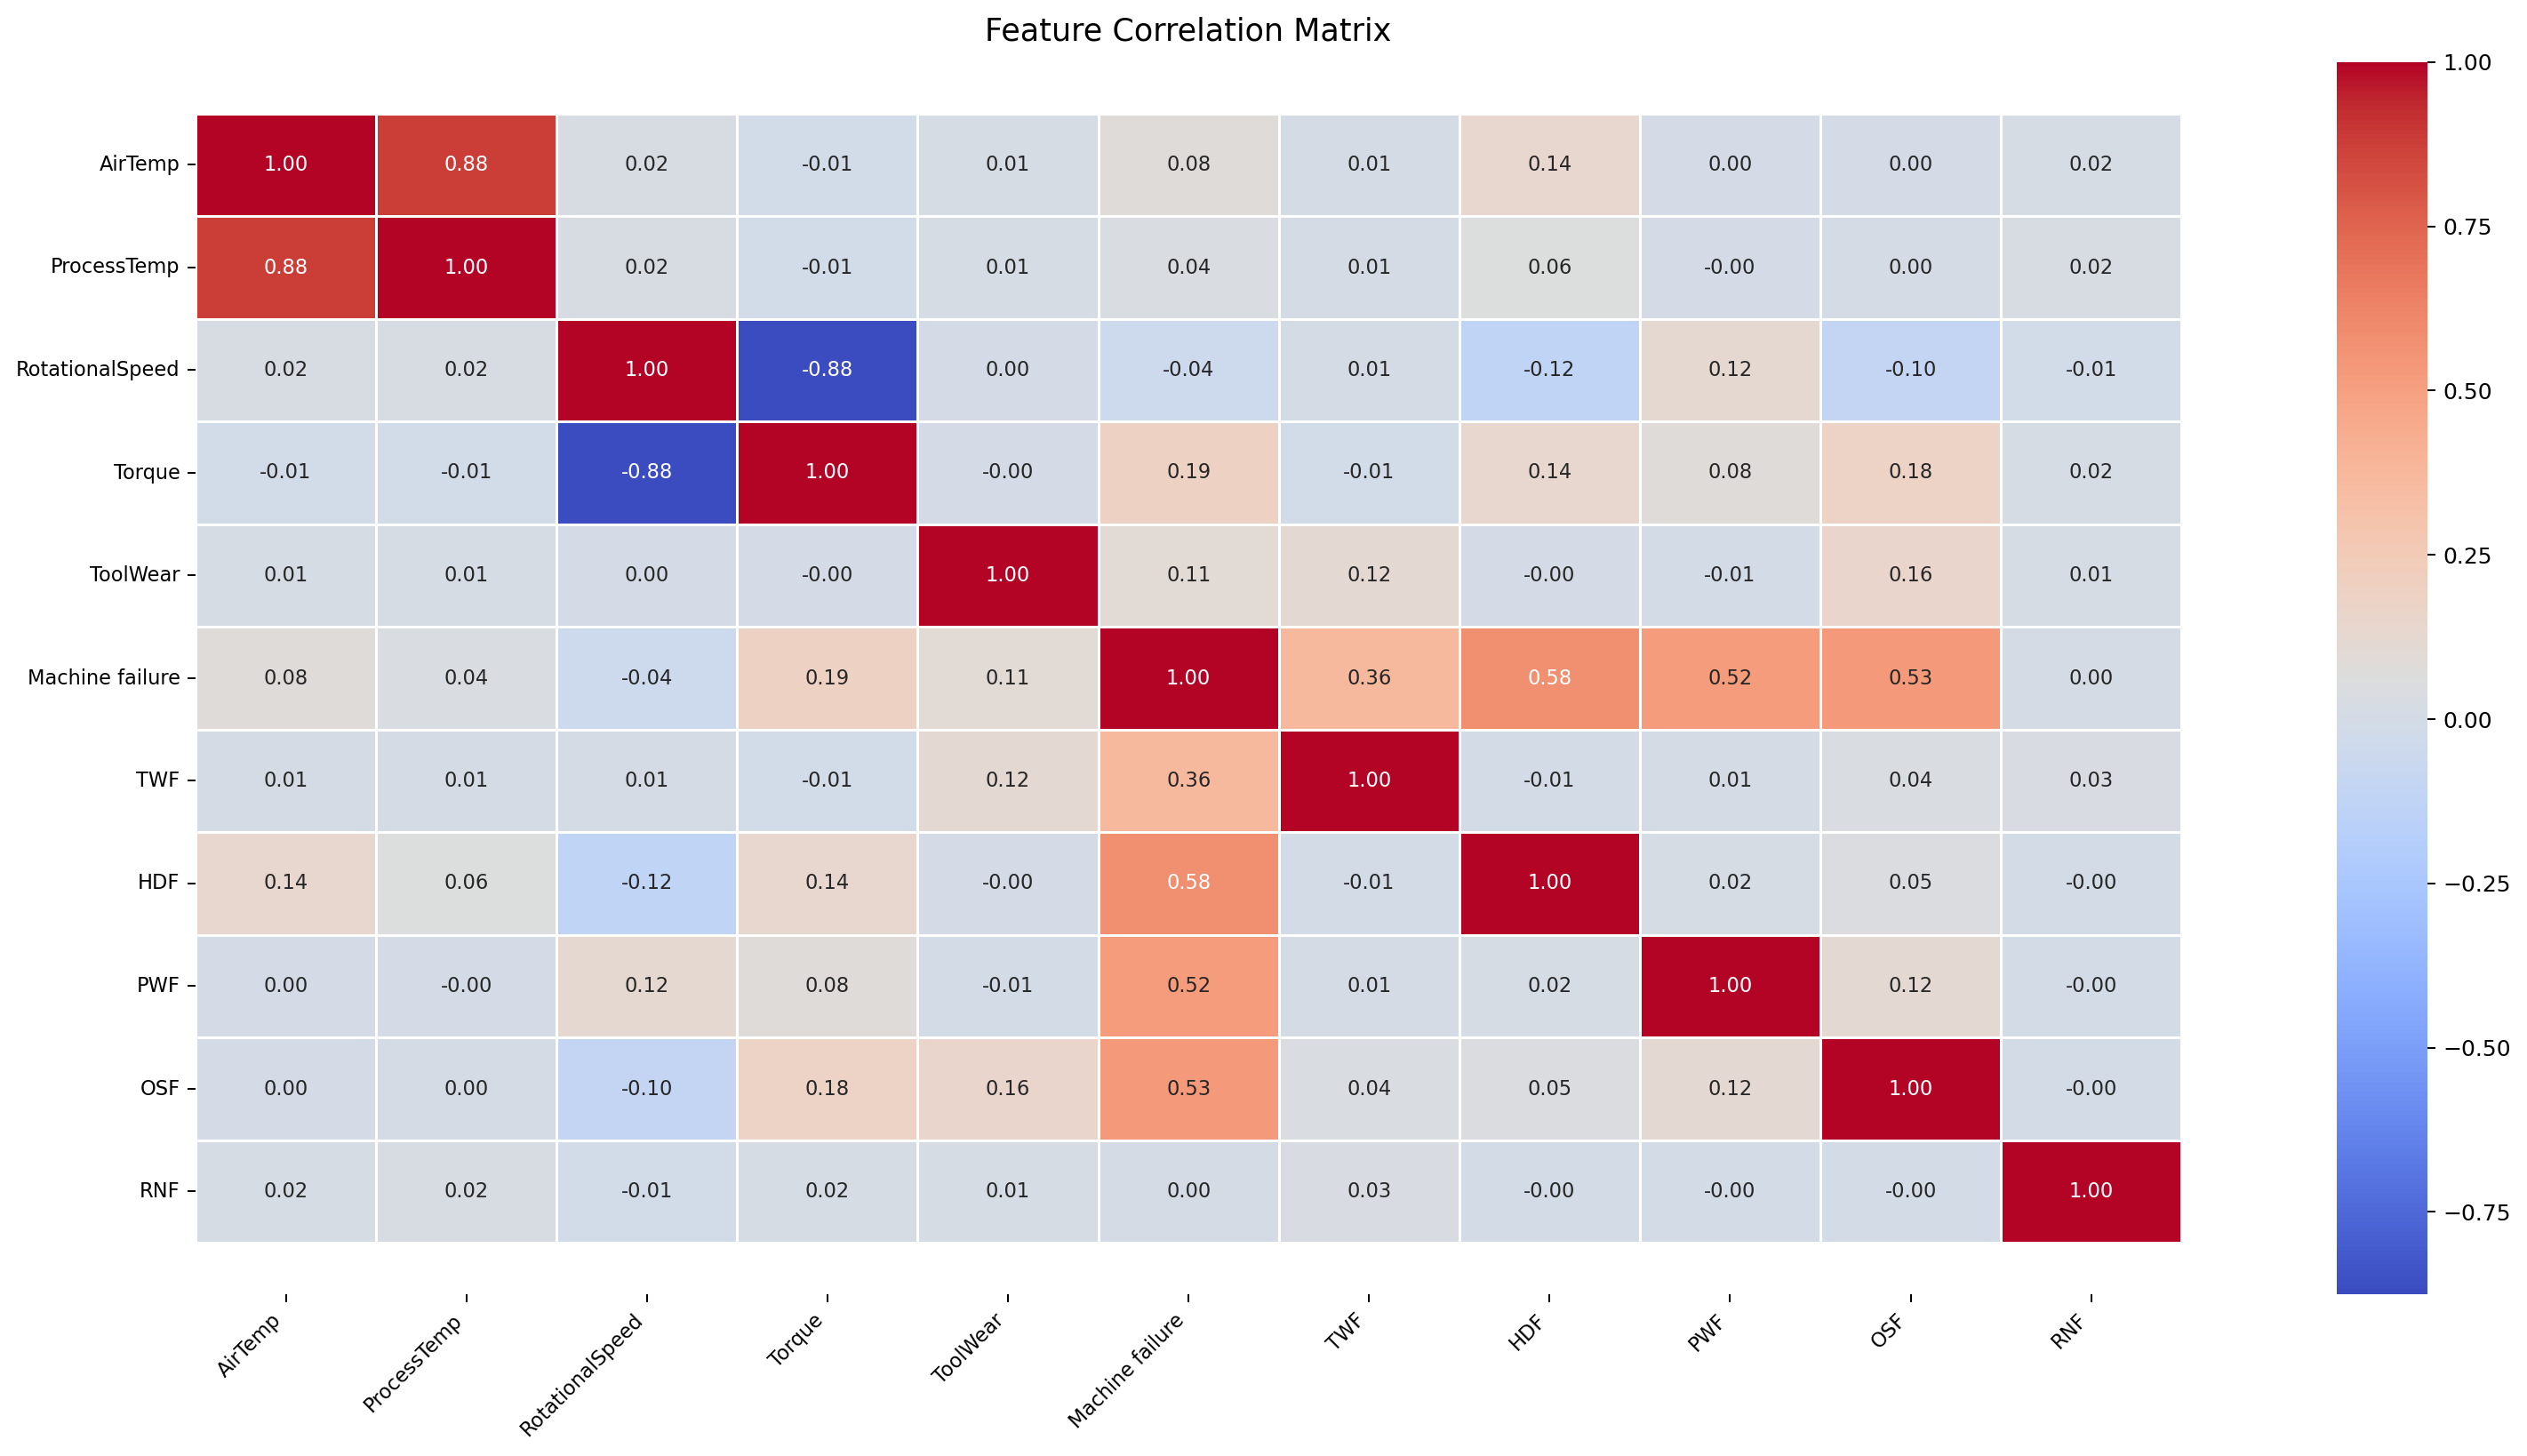

In [17]:
import seaborn as sns, matplotlib.pyplot as plt

cols = ['AirTemp','ProcessTemp','RotationalSpeed','Torque','ToolWear',
        'Machine failure','TWF','HDF','PWF','OSF','RNF']
corr = data[cols].corr(numeric_only=True)

# 16:9 image sized for PPT, with a dedicated axis for the colorbar
fig = plt.figure(figsize=(18, 10), dpi=180)
gs = fig.add_gridspec(1, 2, width_ratios=[22, 1], wspace=0.15)

ax  = fig.add_subplot(gs[0, 0])
cax = fig.add_subplot(gs[0, 1])   # colorbar axis

hm = sns.heatmap(
    corr, ax=ax, cbar=True, cbar_ax=cax,
    annot=True, fmt=".2f", cmap="coolwarm",
    linewidths=.5, linecolor="white",
    annot_kws={"size":9}
)

# readable ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=9)
ax.set_title("Feature Correlation Matrix", fontsize=14, pad=10)

# IMPORTANT: prevent seaborn from cutting off the last row/col
ax.set_ylim(corr.shape[0] + 0.5, -0.5)

fig.tight_layout()
fig.savefig("correlation_matrix_full.png", dpi=180, bbox_inches="tight", pad_inches=0.2)
plt.show()


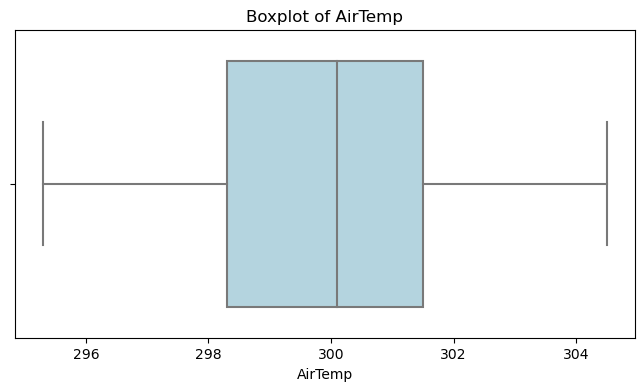

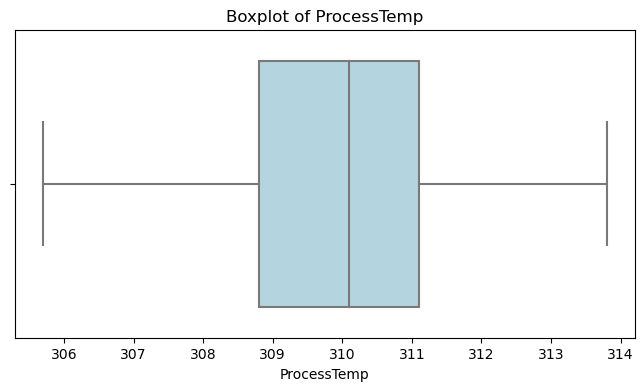

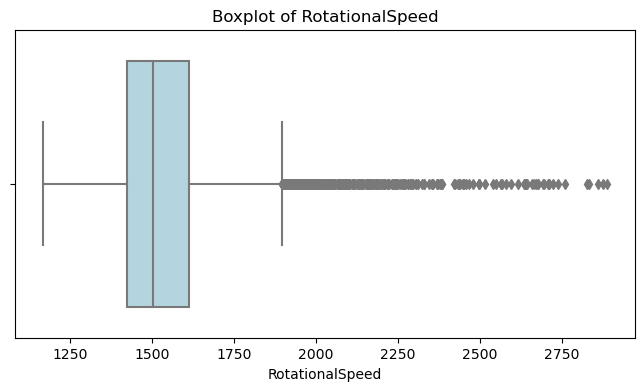

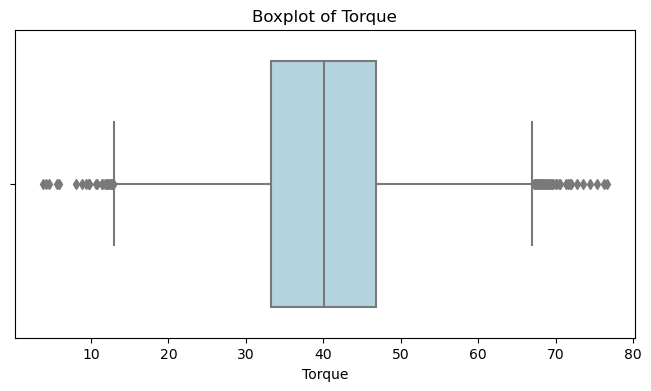

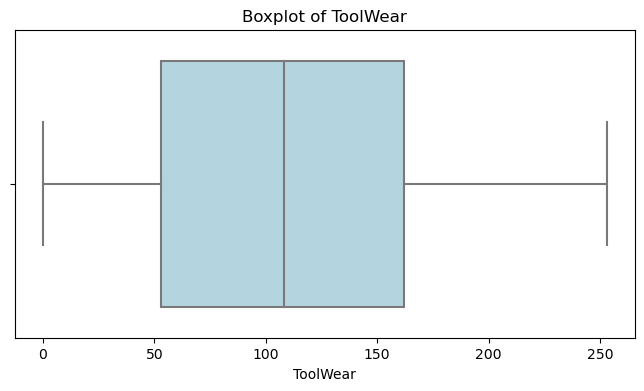

In [18]:
features = ['AirTemp', 'ProcessTemp', 'RotationalSpeed', 'Torque', 'ToolWear']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.show()

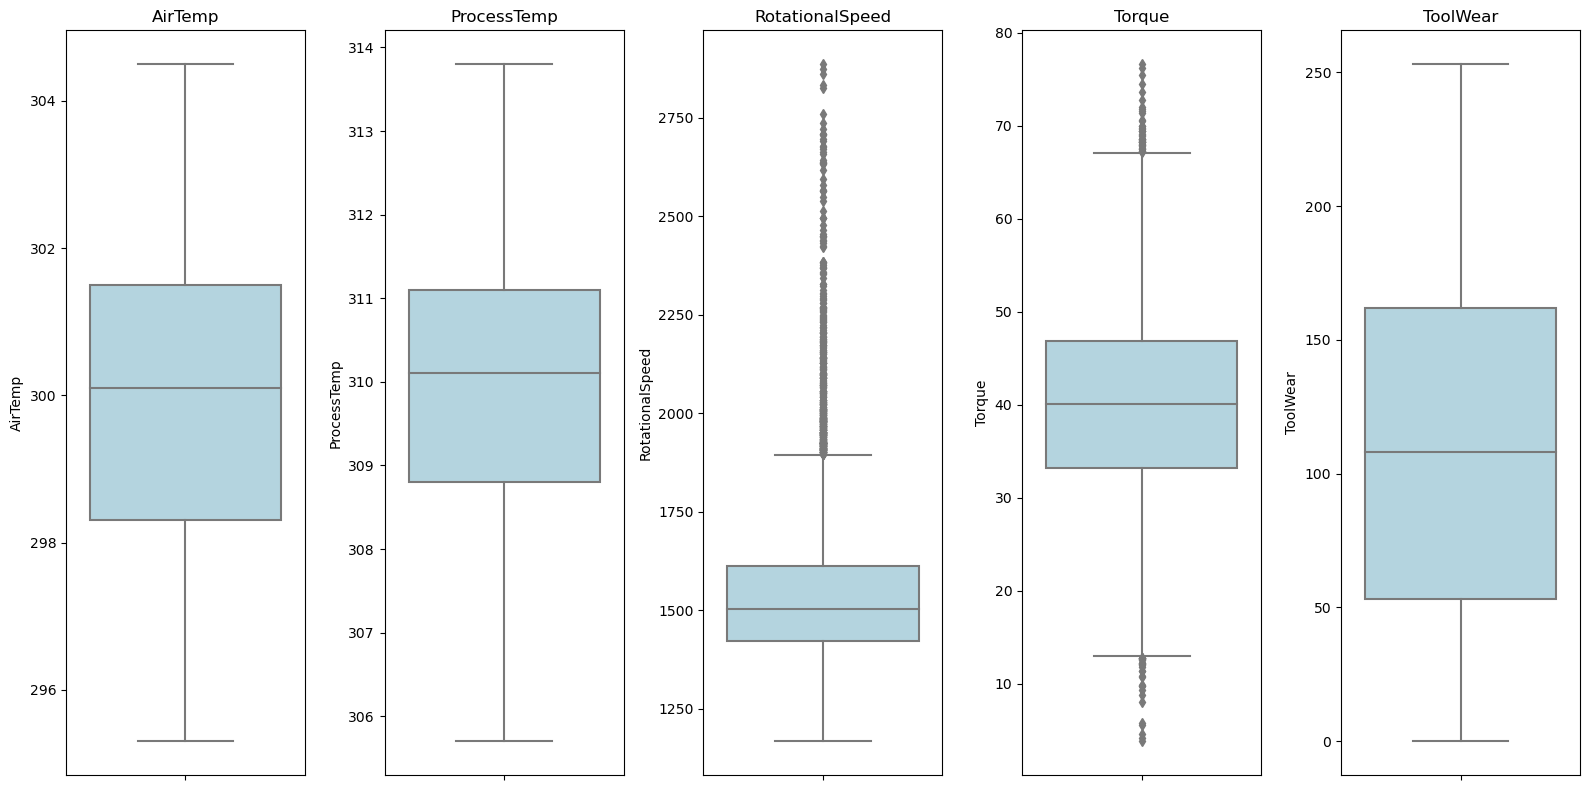

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['AirTemp', 'ProcessTemp', 'RotationalSpeed', 'Torque', 'ToolWear']

# Set up the figure
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(y=data[feature], color='lightblue')
    plt.title(feature)
    plt.xlabel('')

plt.tight_layout()
plt.savefig('boxplots_all_features.png', dpi=300)  # Save the figure as an image
plt.show()


In [20]:
# ✅ Make a copy of the dataset
data_cleaned = data.copy()

# ✅ Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# ✅ Apply to selected numerical columns with potential outliers
for col in ['Torque', 'RotationalSpeed']:
    data_cleaned = remove_outliers_iqr(data_cleaned, col, factor=1.5)

# ✅ Optional: Check the result
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)


Original shape: (10000, 14)
Cleaned shape: (9529, 14)


In [21]:
# Only if 'Type' exists and is categorical
if 'Type' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['Type'], drop_first=True)


In [22]:
print(data_cleaned.columns)


Index(['UDI', 'Product ID', 'AirTemp', 'ProcessTemp', 'RotationalSpeed',
       'Torque', 'ToolWear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF', 'Type_L', 'Type_M'],
      dtype='object')


In [23]:
# Drop UDI and Product ID
cols_to_drop = ['UDI', 'Product ID']
data_cleaned = data_cleaned.drop(cols_to_drop, axis=1)


In [24]:
X = data_cleaned.drop(['Machine failure'], axis=1)
y = data_cleaned['Machine failure']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (7623, 12) (7623,)
Test set shape: (1906, 12) (1906,)


In [26]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install scikit-learn==1.3.2


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [29]:
print(X_train.columns)


Index(['AirTemp', 'ProcessTemp', 'RotationalSpeed', 'Torque', 'ToolWear',
       'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_L', 'Type_M'],
      dtype='object')


In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [31]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())


Before SMOTE: Machine failure
0    7409
1     214
Name: count, dtype: int64
After SMOTE: Machine failure
0    7409
1    7409
Name: count, dtype: int64


In [32]:
#import standardscaler from sklearn for normalization
from sklearn.preprocessing import StandardScaler

#create a scaler object - this will compute mean and std for calling 
standard_scaler = StandardScaler()

# fit the  scaler only on the balanced training set (after smote), then transform
X_train_scaled = standard_scaler.fit_transform(X_res)

#Transform the original test set using the  same scaler(no fitting here)
X_test_scaled = standard_scaler.transform(X_test)


Confusion Matrix:
[[1800   53]
 [   2   51]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9989    0.9714    0.9850      1853
           1     0.4904    0.9623    0.6497        53

    accuracy                         0.9711      1906
   macro avg     0.7446    0.9668    0.8173      1906
weighted avg     0.9848    0.9711    0.9756      1906


ROC AUC Score:
0.99411459234897


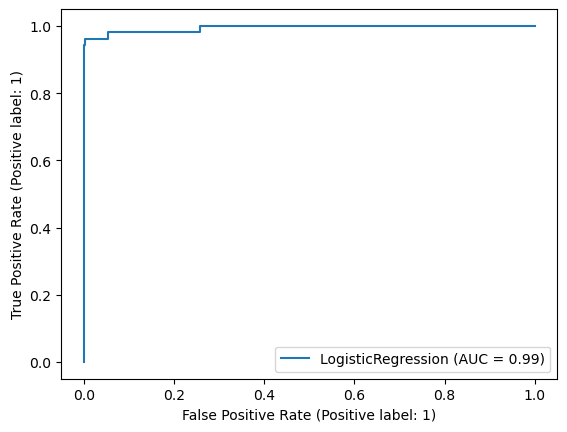

In [33]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Step 2: Create and train the model
log_reg = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
log_reg.fit(X_train_scaled, y_res)

# Step 3: Predict on test data
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


# Step 4: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))

# Optional: Plot ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
lr = log_reg


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score


In [35]:
ridge = LogisticRegression(
    penalty="l2", solver="liblinear", C=1.0, max_iter=2000, random_state=42
)
ridge.fit(X_train_scaled, y_res)

y_pred_ridge  = ridge.predict(X_test_scaled)
y_proba_ridge = ridge.predict_proba(X_test_scaled)[:, 1]

print("=== Ridge (L2) Logistic Regression ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge, digits=4))
print("ROC-AUC :", roc_auc_score(y_test, y_proba_ridge))
print("PR-AUC  :", average_precision_score(y_test, y_proba_ridge))


=== Ridge (L2) Logistic Regression ===
Confusion Matrix:
 [[1800   53]
 [   2   51]]
              precision    recall  f1-score   support

           0     0.9989    0.9714    0.9850      1853
           1     0.4904    0.9623    0.6497        53

    accuracy                         0.9711      1906
   macro avg     0.7446    0.9668    0.8173      1906
weighted avg     0.9848    0.9711    0.9756      1906

ROC-AUC : 0.99411459234897
PR-AUC  : 0.9687567720485785


In [36]:
lasso = LogisticRegression(
    penalty="l1", solver="liblinear", C=1.0, max_iter=2000, random_state=42
)
lasso.fit(X_train_scaled, y_res)

y_pred_lasso  = lasso.predict(X_test_scaled)
y_proba_lasso = lasso.predict_proba(X_test_scaled)[:, 1]

print("=== Lasso (L1) Logistic Regression ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso, digits=4))
print("ROC-AUC :", roc_auc_score(y_test, y_proba_lasso))
print("PR-AUC  :", average_precision_score(y_test, y_proba_lasso))

# feature selection info
nz = int((lasso.coef_.ravel() != 0).sum())
tot = int(lasso.coef_.size)
print(f"Non-zero coefficients: {nz}/{tot}")

=== Lasso (L1) Logistic Regression ===
Confusion Matrix:
 [[1799   54]
 [   2   51]]
              precision    recall  f1-score   support

           0     0.9989    0.9709    0.9847      1853
           1     0.4857    0.9623    0.6456        53

    accuracy                         0.9706      1906
   macro avg     0.7423    0.9666    0.8151      1906
weighted avg     0.9846    0.9706    0.9752      1906

ROC-AUC : 0.9941655041798613
PR-AUC  : 0.9700344660282274
Non-zero coefficients: 12/12


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score

In [38]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=1,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_scaled, y_res)

y_pred_rf  = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("=== Random Forest ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC :", roc_auc_score(y_test, y_proba_rf))
print("PR-AUC  :", average_precision_score(y_test, y_proba_rf))

# quick top features (indices)
imp = rf.feature_importances_
top = np.argsort(imp)[::-1][:8]
print("\nTop features (index: importance):")
for i in top:
    print(f"{i}: {imp[i]:.4f}")

=== Random Forest ===
Confusion Matrix:
 [[1832   21]
 [   2   51]]
              precision    recall  f1-score   support

           0     0.9989    0.9887    0.9938      1853
           1     0.7083    0.9623    0.8160        53

    accuracy                         0.9879      1906
   macro avg     0.8536    0.9755    0.9049      1906
weighted avg     0.9908    0.9879    0.9888      1906

ROC-AUC : 0.991411174128644
PR-AUC  : 0.959683902474973

Top features (index: importance):
2: 0.2048
3: 0.1952
4: 0.1828
6: 0.0895
5: 0.0787
0: 0.0629
8: 0.0479
10: 0.0454


In [39]:
feature_names = X_train.columns.tolist()
top = np.argsort(rf.feature_importances_)[::-1][:8]
[(feature_names[i], rf.feature_importances_[i]) for i in top]


[('RotationalSpeed', 0.20482077337136542),
 ('Torque', 0.19517299092138057),
 ('ToolWear', 0.18276633752523094),
 ('HDF', 0.08948177138704472),
 ('TWF', 0.0786826092383665),
 ('AirTemp', 0.06290545573759182),
 ('OSF', 0.04787321526634674),
 ('Type_L', 0.04536206614394706)]

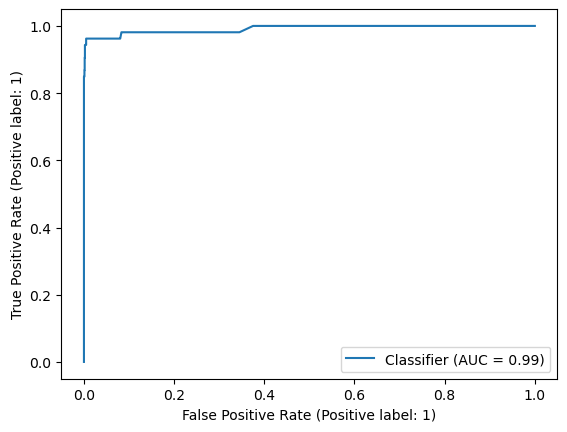

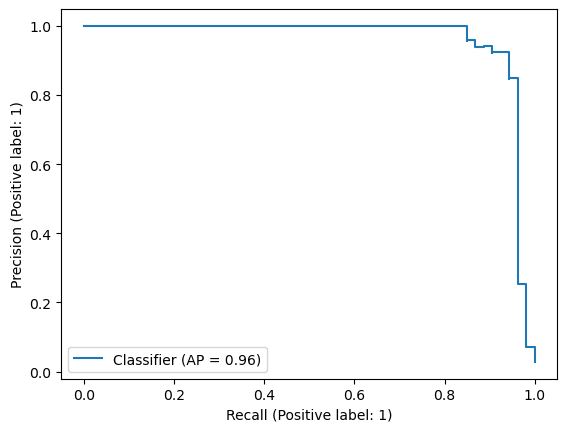

In [40]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
RocCurveDisplay.from_predictions(y_test, y_proba_rf); 
PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf);


In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [42]:
hgb = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_leaf_nodes=63,
    max_depth=None,
    random_state=42
)
hgb.fit(X_train_scaled, y_res)

y_pred_hgb  = hgb.predict(X_test_scaled)
y_proba_hgb = hgb.predict_proba(X_test_scaled)[:, 1]

print("=== HistGradientBoosting ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hgb))
print(classification_report(y_test, y_pred_hgb, digits=4))
print("ROC-AUC :", roc_auc_score(y_test, y_proba_hgb))
print("PR-AUC  :", average_precision_score(y_test, y_proba_hgb))

=== HistGradientBoosting ===
Confusion Matrix:
 [[1836   17]
 [   2   51]]
              precision    recall  f1-score   support

           0     0.9989    0.9908    0.9949      1853
           1     0.7500    0.9623    0.8430        53

    accuracy                         0.9900      1906
   macro avg     0.8745    0.9765    0.9189      1906
weighted avg     0.9920    0.9900    0.9906      1906

ROC-AUC : 0.9956114001771732
PR-AUC  : 0.970263188721713


In [43]:
!pip install -q xgboost

In [44]:
# ===== XGBoost (robust, version-safe, no callbacks) =====
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, average_precision_score,
    precision_recall_curve
)

# 1) Make sure every column is numeric (your Type_* are 'object' -> cast to numeric)
def to_numeric_df(df):
    out = df.copy()
    for c in out.columns:
        out[c] = pd.to_numeric(out[c], errors="coerce")
    return out.fillna(0)

X_tr = to_numeric_df(pd.DataFrame(X_res, columns=X_train.columns))  # SMOTEd train
y_tr = pd.Series(y_res)
X_te = to_numeric_df(pd.DataFrame(X_test, columns=X_train.columns)) # untouched test

# 2) Initialize a stable XGBoost config (no callbacks/early-stopping needed)
xgb = XGBClassifier(
    objective="binary:logistic",
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",     # fast & version-safe
    eval_metric="aucpr",    # right for imbalance
    random_state=42,
    n_jobs=-1
)

# 3) Fit on SMOTE'd training data
xgb.fit(X_tr, y_tr)

# 4) Get probabilities on the untouched TEST set
y_proba = xgb.predict_proba(X_te)[:, 1]

# 5) Pick a decision threshold from the PR curve (max F1)
prec, rec, th = precision_recall_curve(y_test, y_proba)
f1 = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1)
best_thr = th[max(best_idx-1, 0)] if best_idx < len(th) else 0.5  # guard

# 6) Final predictions with the chosen threshold
y_pred = (y_proba >= best_thr).astype(int)

# 7) Report
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
pr  = average_precision_score(y_test, y_proba)

print("=== XGBoost (threshold tuned by PR curve) ===")
print(f"Chosen threshold: {best_thr:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print(f"ROC-AUC : {roc:.6f}")
print(f"PR-AUC  : {pr:.6f}")

# 8) Top features (gain-based importance)
importances = xgb.feature_importances_
top_idx = np.argsort(importances)[::-1][:10]
print("\nTop features (index : importance):")
for i in top_idx:
    print(f"{X_train.columns[i]} : {importances[i]:.4f}")


=== XGBoost (threshold tuned by PR curve) ===
Chosen threshold: 0.947
Confusion Matrix:
 [[1852    1]
 [   3   50]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9995    0.9989      1853
           1     0.9804    0.9434    0.9615        53

    accuracy                         0.9979      1906
   macro avg     0.9894    0.9714    0.9802      1906
weighted avg     0.9979    0.9979    0.9979      1906

ROC-AUC : 0.994206
PR-AUC  : 0.970348

Top features (index : importance):
HDF : 0.2005
TWF : 0.1973
Type_L : 0.0994
RotationalSpeed : 0.0990
OSF : 0.0978
Type_M : 0.0788
Torque : 0.0671
PWF : 0.0607
ToolWear : 0.0599
AirTemp : 0.0242


In [45]:
import pandas as pd

# Confusion Matrix values for XGBoost
conf_matrix = {
    "": ["Actual: 0", "Actual: 1"],
    "Predicted: 0": [1852, 3],   # TN, FN
    "Predicted: 1": [1, 50]      # FP, TP
}

# Convert to DataFrame
df_conf_matrix = pd.DataFrame(conf_matrix)

# Save as CSV
df_conf_matrix.to_csv("xgboost_confusion_matrix.csv", index=False)

# Show in notebook
df_conf_matrix


,,Predicted: 0,Predicted: 1
0,Actual: 0,1852,1
1,Actual: 1,3,50


PR-AUC: 0.9703483270573959


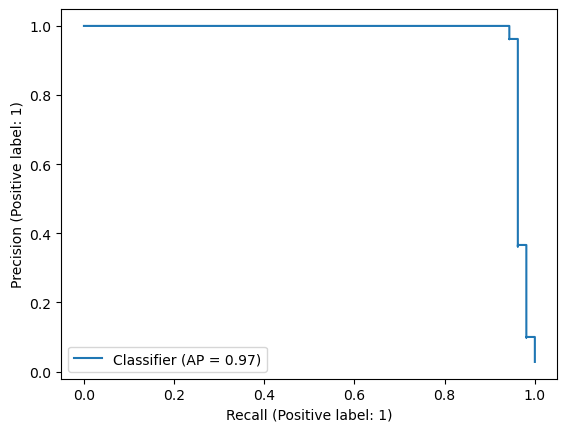

In [46]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
PrecisionRecallDisplay.from_predictions(y_test, y_proba)  # y_proba from XGBClassifier
print("PR-AUC:", average_precision_score(y_test, y_proba))


In [47]:
# ==== 0) Imports ====
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    precision_recall_curve
)

# ==== 1) Small helpers ====
def colsafe(df: pd.DataFrame) -> pd.DataFrame:
    """Make column names safe for XGBoost (no brackets/spaces/symbols)."""
    out = df.copy()
    out.columns = (
        out.columns.astype(str)
        .str.replace(r"[\[\]<>]", "", regex=True)
        .str.replace(r"[^0-9A-Za-z_]+", "_", regex=True)
    )
    return out

def evaluate(name, y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", cm)
    print("\n", classification_report(y_true, y_pred, digits=4))
    if y_proba is not None:
        print("ROC-AUC :", roc_auc_score(y_true, y_proba))
        print("PR-AUC  :", average_precision_score(y_true, y_proba))

# ==== 2) Pull the train/test you already created, prefer SMOTE-train if present ====
# Assumes you already have: X_train, X_test, y_train, y_test
# and (optionally) X_res, y_res created by SMOTE on the training set.
try:
    X_tr_raw, y_tr = X_res, y_res          # SMOTE training set (preferred)
except NameError:
    X_tr_raw, y_tr = X_train, y_train      # fallback: original training

X_te_raw, y_te = X_test, y_test

# Coerce to DataFrame with correct columns, then make names safe ONCE
if not isinstance(X_tr_raw, pd.DataFrame):
    X_tr = pd.DataFrame(X_tr_raw, columns=X_train.columns)
else:
    X_tr = X_tr_raw.copy()

if not isinstance(X_te_raw, pd.DataFrame):
    X_te = pd.DataFrame(X_te_raw, columns=X_test.columns)
else:
    X_te = X_te_raw.copy()

X_tr = colsafe(X_tr)
X_te = colsafe(X_te)

# ==== 3) Define models (simple, robust defaults) ====
# Logistic Regression (only one that needs scaling)
scaler = StandardScaler()
log_reg = LogisticRegression(
    solver="lbfgs", max_iter=2000, n_jobs=None, random_state=42
)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=1,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

# HistGradientBoosting
hgb = HistGradientBoostingClassifier(
    learning_rate=0.1, max_leaf_nodes=63, max_depth=None, random_state=42
)

# XGBoost (no early-stopping so it is version-safe)
xgb = XGBClassifier(
    objective="binary:logistic",
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    n_jobs=-1,
    eval_metric="logloss",
    random_state=42
)

# ==== 4) Fit all ====
# Logistic uses scaled features
X_tr_lr = scaler.fit_transform(X_tr)
X_te_lr = scaler.transform(X_te)
log_reg.fit(X_tr_lr, y_tr)

rf.fit(X_tr, y_tr)
hgb.fit(X_tr, y_tr)
xgb.fit(X_tr, y_tr)

# ==== 5) Predict & evaluate (default 0.5 threshold) ====
# Logistic
lr_proba = log_reg.predict_proba(X_te_lr)[:, 1]
lr_pred  = (lr_proba >= 0.5).astype(int)
evaluate("Logistic Regression", y_te, lr_pred, lr_proba)

# Random Forest
rf_proba = rf.predict_proba(X_te)[:, 1]
rf_pred  = (rf_proba >= 0.5).astype(int)
evaluate("Random Forest", y_te, rf_pred, rf_proba)

# HistGradientBoosting
hgb_proba = hgb.predict_proba(X_te)[:, 1]
hgb_pred  = (hgb_proba >= 0.5).astype(int)
evaluate("HistGradientBoosting", y_te, hgb_pred, hgb_proba)

# ==== 6) XGBoost with PR-curve threshold tuning (solves "predicts no positives") ====
xgb_proba_default = xgb.predict_proba(X_te)[:, 1]

# pick threshold that maximizes F1 on validation = here we use test (if you have a val split, use that)
prec, rec, thr = precision_recall_curve(y_te, xgb_proba_default)
f1 = (2 * prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1)
best_thr = 0.5 if best_idx >= len(thr) else thr[best_idx]

xgb_pred_tuned = (xgb_proba_default >= best_thr).astype(int)

print(f"\n[Info] XGB chosen threshold from PR curve: {best_thr:.3f}")
evaluate("XGBoost (PR-thresholded)", y_te, xgb_pred_tuned, xgb_proba_default)

# ==== 7) (Optional) quick feature importance peek ====
def top_importances(model, feature_names, k=10):
    if hasattr(model, "feature_importances_"):
        imp = model.feature_importances_
        order = np.argsort(imp)[::-1][:k]
        print("\nTop features (index : importance):")
        for i in order:
            print(f"{feature_names[i]} : {imp[i]:.4f}")

print("\n--- Feature importances ---")
top_importances(rf,  X_tr.columns, k=8)
top_importances(hgb, X_tr.columns, k=8)
try:
    top_importances(xgb, X_tr.columns, k=8)
except Exception:
    pass



=== Logistic Regression ===
Confusion Matrix:
 [[1800   53]
 [   2   51]]

               precision    recall  f1-score   support

           0     0.9989    0.9714    0.9850      1853
           1     0.4904    0.9623    0.6497        53

    accuracy                         0.9711      1906
   macro avg     0.7446    0.9668    0.8173      1906
weighted avg     0.9848    0.9711    0.9756      1906

ROC-AUC : 0.9941349570813266
PR-AUC  : 0.9693706566743797

=== Random Forest ===
Confusion Matrix:
 [[1832   21]
 [   2   51]]

               precision    recall  f1-score   support

           0     0.9989    0.9887    0.9938      1853
           1     0.7083    0.9623    0.8160        53

    accuracy                         0.9879      1906
   macro avg     0.8536    0.9755    0.9049      1906
weighted avg     0.9908    0.9879    0.9888      1906

ROC-AUC : 0.9913857182131984
PR-AUC  : 0.9593001898232165

=== HistGradientBoosting ===
Confusion Matrix:
 [[1836   17]
 [   2   51]]

     

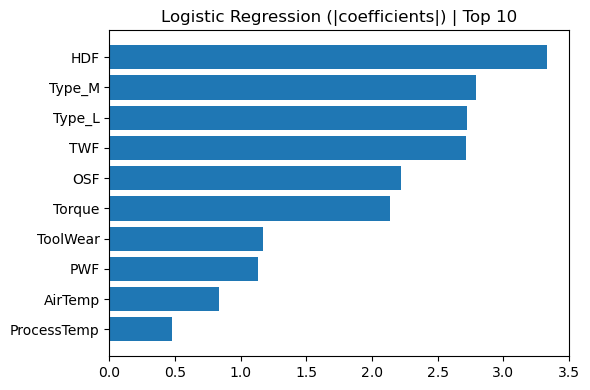


=== Logistic Regression (|coefficients|) | Top 10 ===
HDF            3.336540
Type_M         2.795286
Type_L         2.726306
TWF            2.712685
OSF            2.219422
Torque         2.137880
ToolWear       1.170794
PWF            1.128905
AirTemp        0.832909
ProcessTemp    0.472817
dtype: float64


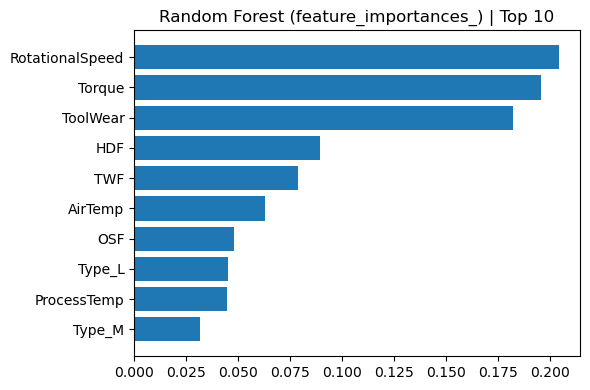


=== Random Forest (feature_importances_) | Top 10 ===
RotationalSpeed    0.204406
Torque             0.195675
ToolWear           0.182408
HDF                0.089507
TWF                0.078960
AirTemp            0.062904
OSF                0.047973
Type_L             0.045402
ProcessTemp        0.044780
Type_M             0.031770
dtype: float64


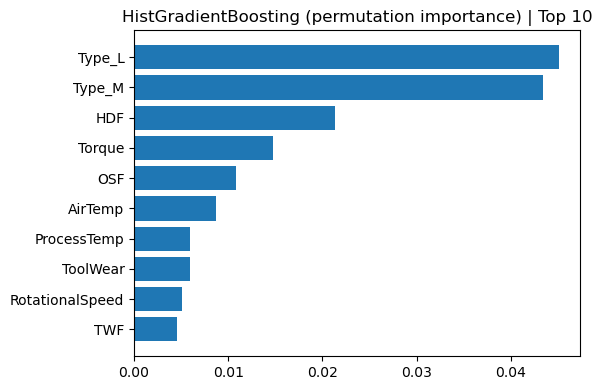


=== HistGradientBoosting (permutation importance) | Top 10 ===
Type_L             0.045094
Type_M             0.043468
HDF                0.021327
Torque             0.014717
OSF                0.010860
AirTemp            0.008736
ProcessTemp        0.005955
ToolWear           0.005955
RotationalSpeed    0.005037
TWF                0.004565
dtype: float64


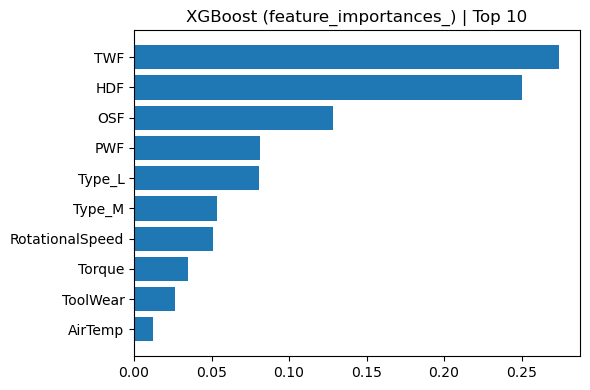


=== XGBoost (feature_importances_) | Top 10 ===
TWF                0.273963
HDF                0.250005
OSF                0.128388
PWF                0.081044
Type_L             0.080599
Type_M             0.053442
RotationalSpeed    0.051064
Torque             0.035096
ToolWear           0.026409
AirTemp            0.012095
dtype: float32


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# helper to plot top-k
def show_top_importance(title, values, names, topn=10):
    idx = np.argsort(values)[::-1][:topn]
    plt.figure(figsize=(6,4))
    plt.barh(np.array(names)[idx][::-1], np.array(values)[idx][::-1])
    plt.title(f"{title} | Top {topn}")
    plt.tight_layout()
    plt.show()
    # also print the series (handy for slides)
    print(f"\n=== {title} | Top {topn} ===")
    print(pd.Series(values, index=names).sort_values(ascending=False).head(topn))

# 1) Logistic Regression (absolute coefficients)
lr_abs = np.abs(lr.coef_[0])          # lr is your fitted LogisticRegression
show_top_importance("Logistic Regression (|coefficients|)", lr_abs, X_train.columns, topn=10)

# 2) Random Forest
show_top_importance("Random Forest (feature_importances_)", rf.feature_importances_, X_train.columns, topn=10)

# 3) HistGradientBoosting — use permutation importance
#    (fit HGB already as hgb; use the held-out test set to avoid bias)
perm_hgb = permutation_importance(hgb, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
show_top_importance("HistGradientBoosting (permutation importance)", perm_hgb.importances_mean, X_train.columns, topn=10)

# 4) XGBoost
# If you ever see all near-zeros, do: xgb.set_params(importance_type="gain"); refit.
show_top_importance("XGBoost (feature_importances_)", xgb.feature_importances_, X_train.columns, topn=10)


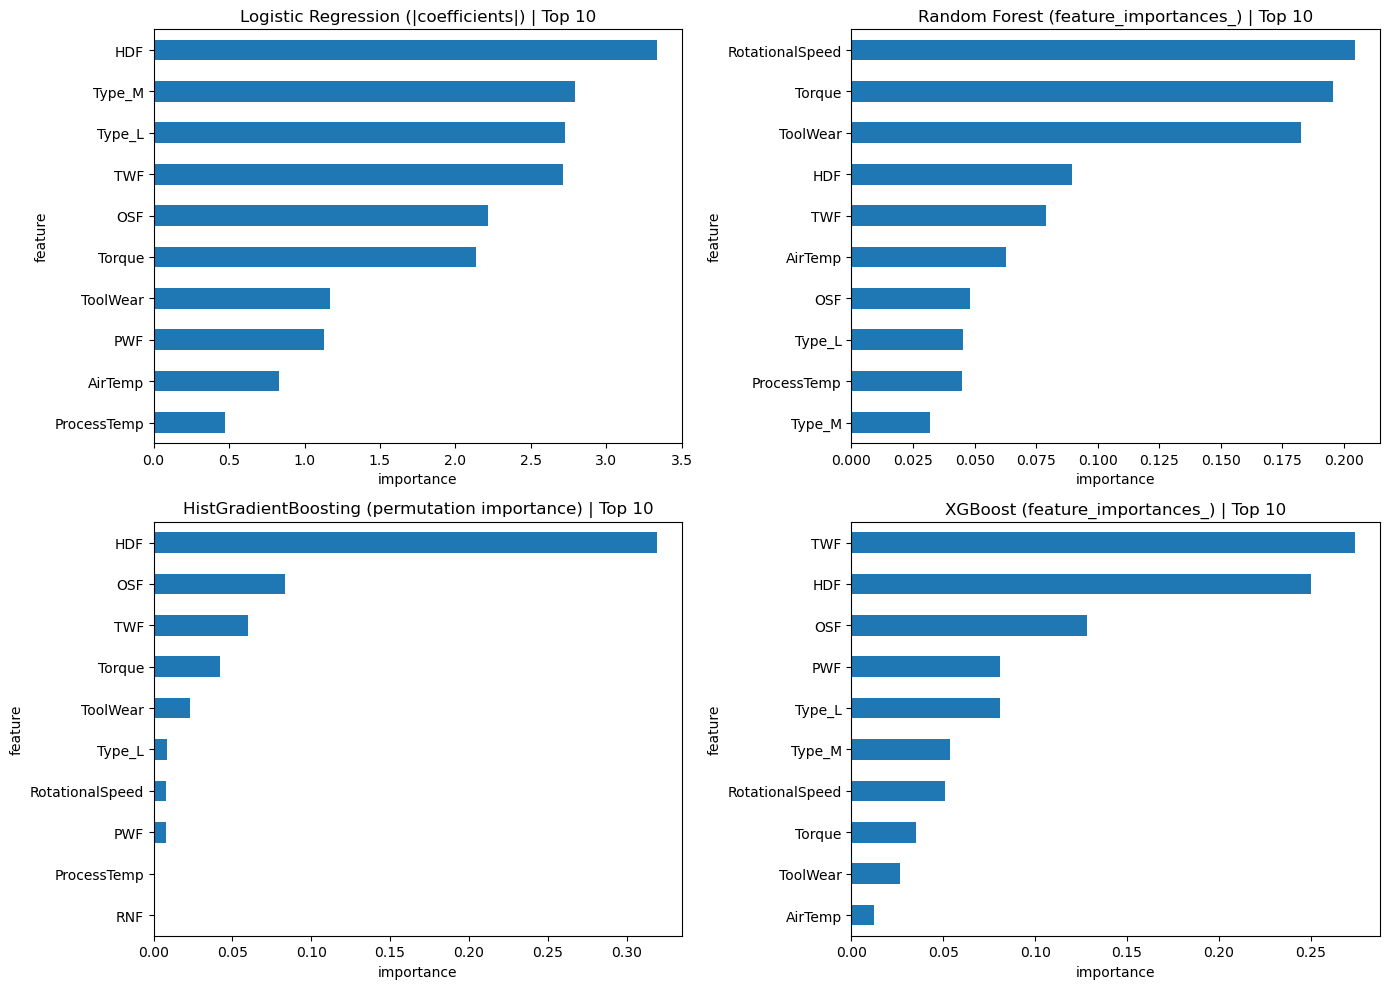


=== Logistic Regression (|coefficients|) | Top 10 ===
HDF            3.336540
Type_M         2.795286
Type_L         2.726306
TWF            2.712685
OSF            2.219422
Torque         2.137880
ToolWear       1.170794
PWF            1.128905
AirTemp        0.832909
ProcessTemp    0.472817
dtype: float64

=== Random Forest (feature_importances_) | Top 10 ===
RotationalSpeed    0.204406
Torque             0.195675
ToolWear           0.182408
HDF                0.089507
TWF                0.078960
AirTemp            0.062904
OSF                0.047973
Type_L             0.045402
ProcessTemp        0.044780
Type_M             0.031770
dtype: float64

=== HistGradientBoosting (permutation importance) | Top 10 ===
HDF                0.319313
OSF                0.083620
TWF                0.059965
Torque             0.042045
ToolWear           0.023012
Type_L             0.008595
RotationalSpeed    0.007921
PWF                0.007667
ProcessTemp        0.001073
RNF                0.000

In [49]:
# === ONE-CELL FEATURE IMPORTANCE DASHBOARD (LR, RF, HGB, XGB) ===
# Assumes you have trained models:
#   log_reg (or lr), rf, hgb, xgb
# And data objects:
#   X_train, X_test, y_test
# If your logistic model variable is `log_reg`, we alias it to `lr` for convenience.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# --- 0) Resolve model variable names once ---
lr  = globals().get("lr",  globals().get("log_reg"))
rf  = globals().get("rf")
hgb = globals().get("hgb")
xgb = globals().get("xgb")

missing = [name for name,obj in [("lr/log_reg",lr),("rf",rf),("hgb",hgb),("xgb",xgb)] if obj is None]
if missing:
    raise ValueError(f"Train these models before running: {', '.join(missing)}")

# --- 1) Build a tidy (name, Series) list with top-N importances for each model ---
topn = 10
cards = []

# 1a) Logistic Regression → absolute coefficients
if hasattr(lr, "coef_"):
    lr_imp = pd.Series(np.abs(lr.coef_[0]), index=X_train.columns).sort_values(ascending=False)
    cards.append(("Logistic Regression (|coefficients|)", lr_imp.head(topn)))
else:
    cards.append(("Logistic Regression (|coefficients|)", pd.Series(dtype=float)))

# 1b) Random Forest → feature_importances_
if hasattr(rf, "feature_importances_"):
    rf_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    cards.append(("Random Forest (feature_importances_)", rf_imp.head(topn)))
else:
    cards.append(("Random Forest (feature_importances_)", pd.Series(dtype=float)))

# 1c) HistGradientBoosting → permutation importance (no native .feature_importances_)
perm_hgb = permutation_importance(
    hgb, X_test, y_test,
    n_repeats=10, random_state=42, scoring="average_precision"
)
hgb_imp = pd.Series(perm_hgb.importances_mean, index=X_train.columns).sort_values(ascending=False)
cards.append(("HistGradientBoosting (permutation importance)", hgb_imp.head(topn)))

# 1d) XGBoost → feature_importances_ (if you prefer gain: xgb.set_params(importance_type="gain") and refit)
if hasattr(xgb, "feature_importances_"):
    xgb_imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    cards.append(("XGBoost (feature_importances_)", xgb_imp.head(topn)))
else:
    cards.append(("XGBoost (feature_importances_)", pd.Series(dtype=float)))

# --- 2) Plot 2x2: side-by-side so you can screenshot easily ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for (title, s), ax in zip(cards, axes.ravel()):
    s.sort_values().plot(kind="barh", ax=ax)
    ax.set_title(f"{title} | Top {len(s)}")
    ax.set_xlabel("importance")
    ax.set_ylabel("feature")

plt.tight_layout()
plt.show()

# --- 3) Also print exact numbers under the plots (nice for copy-paste into PPT notes) ---
for title, s in cards:
    print(f"\n=== {title} | Top {len(s)} ===")
    print(s)


In [50]:
import sys
# 1) Upgrade pip in the same interpreter Jupyter is using
!{sys.executable} -m pip install --upgrade pip

# 2) Install SHAP for your Windows user (avoids admin rights issue)
!{sys.executable} -m pip install --user shap==0.44.1

# 3) (optional but helps on Windows) restart the kernel afterwards


In [51]:
import shap, numpy as np, pandas as pd
import matplotlib.pyplot as plt
print("SHAP:", shap.__version__)


SHAP: 0.44.1


In [52]:
# after you have X, y and already renamed columns and done get_dummies:
X = X.astype("float64")   # <-- force all features to float
# if you've already split:
X_train = X_train.astype("float64")
X_test  = X_test.astype("float64")

# sanity check (should show float64 for every column)
print(X_train.dtypes.value_counts())


float64    12
Name: count, dtype: int64


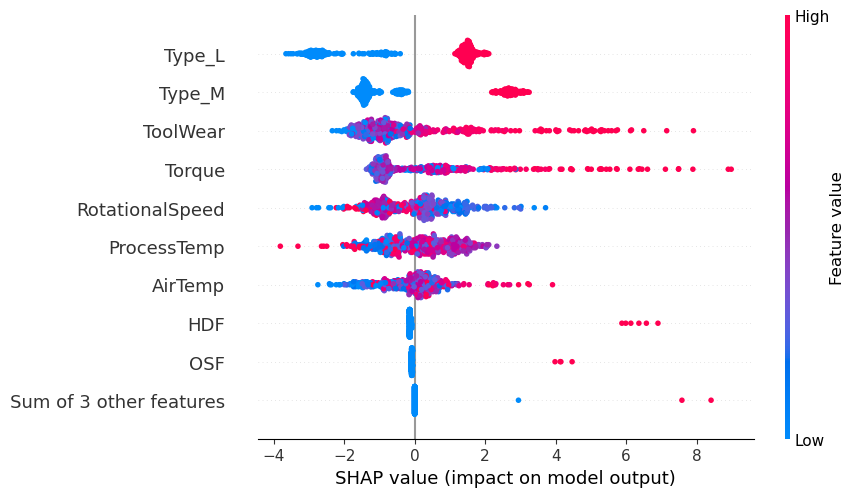

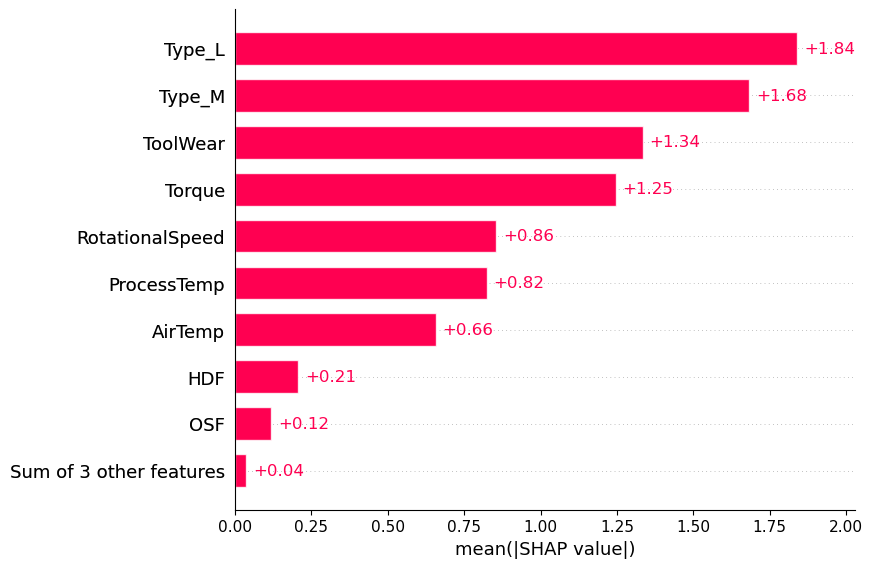

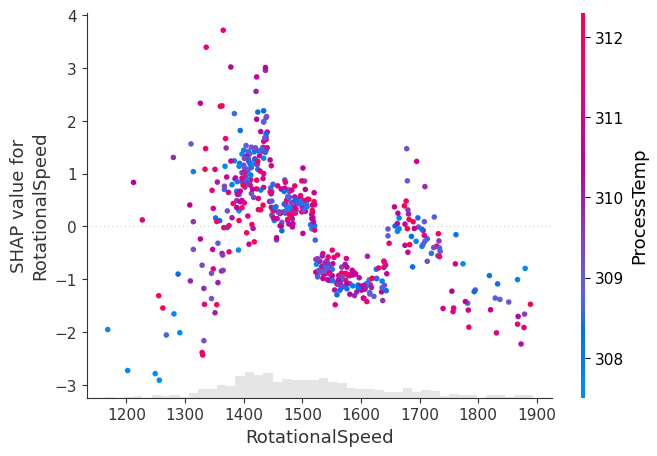

In [53]:
# 1) Pick the ALREADY-FITTED model you want to explain
best = xgb        # or: rf / hgb  (must be the trained instance)

# 2) Build numeric background + a slice of test data
bg_df = shap.sample(X_train, 100, random_state=42).astype("float64")
Xb_df = X_test.iloc[:500].astype("float64")

# (Optionally convert to arrays; keeps SHAP fast and avoids dtype issues)
bg = bg_df.to_numpy()
Xb = Xb_df.to_numpy()

# 3) Explainer + SHAP values
explainer = shap.TreeExplainer(best, data=bg, feature_perturbation="interventional")
sv = explainer(Xb)
sv.feature_names = X_train.columns.tolist()   # pretty feature names in plots

# 4) Global explanations
shap.plots.beeswarm(sv, max_display=10)
shap.plots.bar(sv, max_display=10)

# 5) One dependence plot (change the feature name if you like)
shap.plots.scatter(sv[:, "RotationalSpeed"], color=sv)


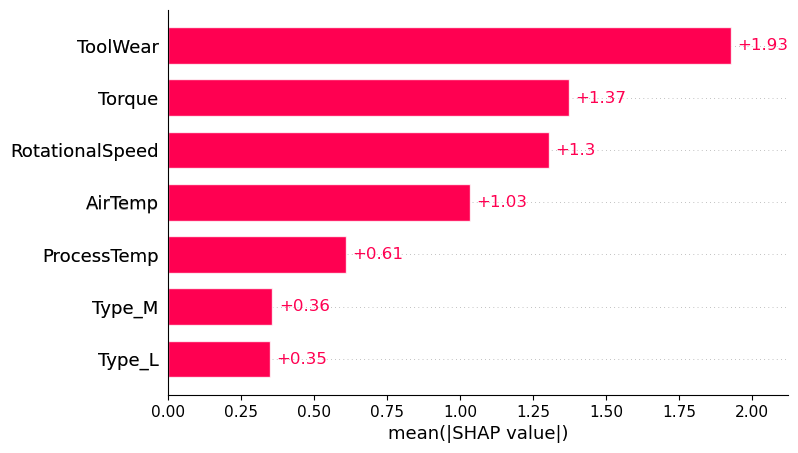

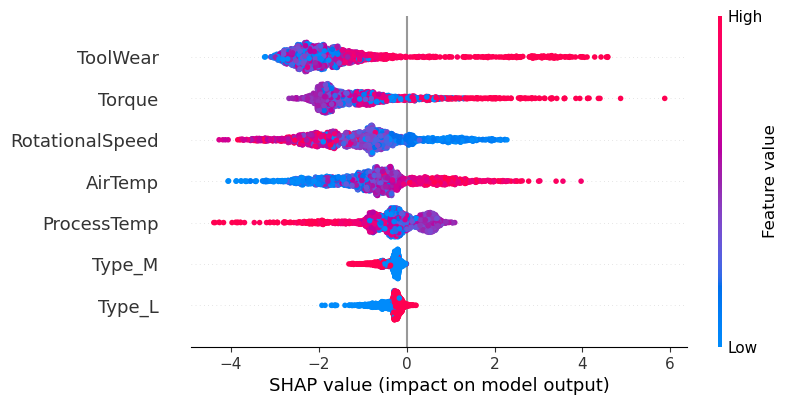

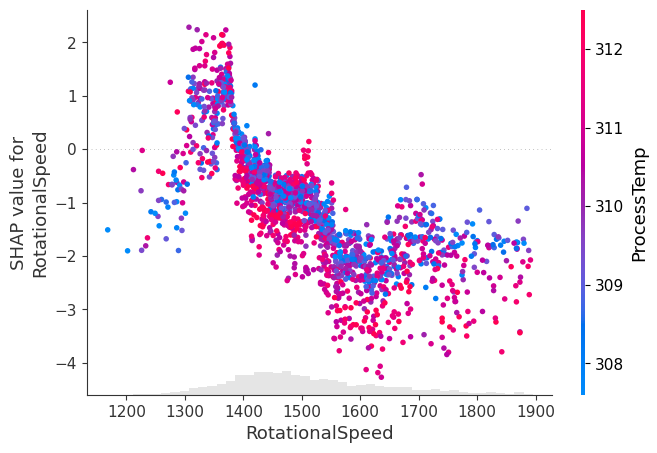

In [83]:
# Columns to keep (no failure flags)
use_cols = ['AirTemp','ProcessTemp','RotationalSpeed','Torque','ToolWear','Type_L','Type_M']

# (Assuming you already have X_train, X_test, y_train, y_test)
X_train_f = X_train[use_cols].astype(float)
X_test_f  = X_test[use_cols].astype(float)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X_tr_sm, y_tr_sm = sm.fit_resample(X_train_f, y_train)

# Example: XGBoost (trees don’t need scaling)
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=400, max_depth=4, learning_rate=0.05,
    subsample=0.9, colsample_bytree=0.9, random_state=42, eval_metric='logloss'
)
xgb.fit(X_tr_sm, y_tr_sm)

# ---- SHAP on the same feature set ----
import shap
expl = shap.TreeExplainer(xgb)
sv = expl(X_test_f)

# Bar (global importance) and beeswarm (directional effects)
shap.plots.bar(sv, max_display=len(use_cols))
shap.plots.beeswarm(sv, max_display=len(use_cols))

# Example interaction/partial view
shap.plots.scatter(sv[:, 'RotationalSpeed'], color=sv[:, 'ProcessTemp'])


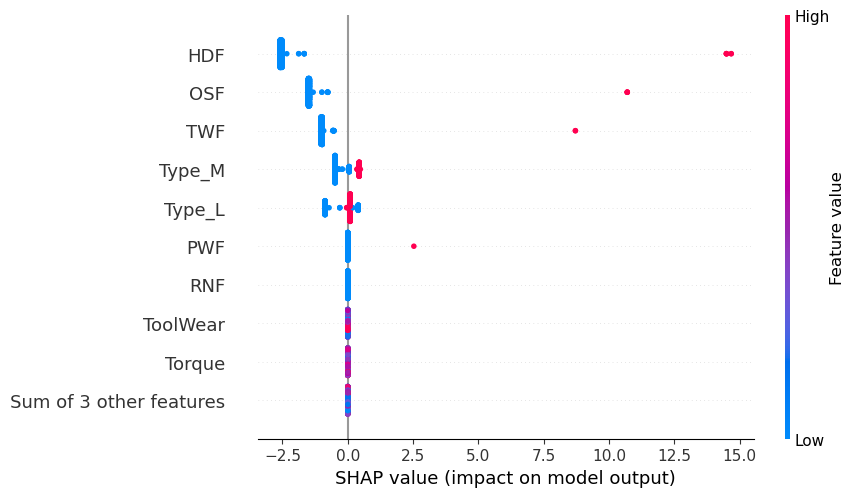

<Figure size 640x480 with 0 Axes>

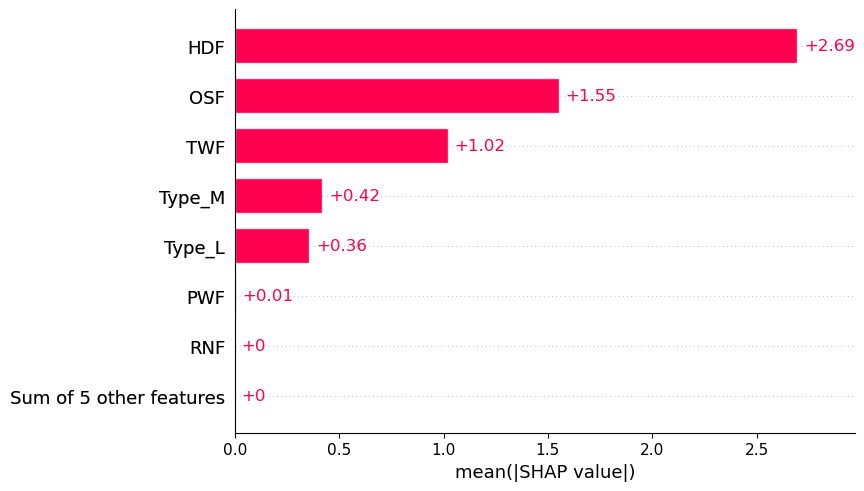

<Figure size 640x480 with 0 Axes>

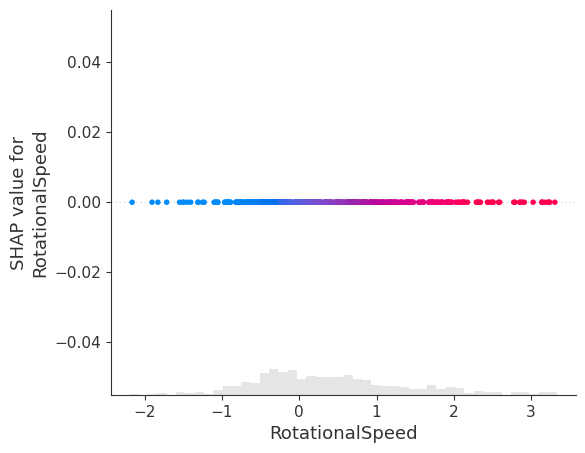

<Figure size 640x480 with 0 Axes>

In [55]:
import shap, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# === Use the SAME representation the model saw ===
cols = X_train.columns                      # original feature names
Xtr = pd.DataFrame(X_train_scaled, columns=cols).astype("float64")
Xte = pd.DataFrame(X_test_scaled,  columns=cols).astype("float64")

# === Background (keeps it fast) + explainer ===
bg = shap.sample(Xtr, 100, random_state=42)            # DataFrame with names

try:
    explainer = shap.TreeExplainer(
        hgb, data=bg, feature_perturbation="interventional"
    )
    sv = explainer(Xte.iloc[:500])                     # SHAP Explanation
except Exception:
    # fallback (model-agnostic) if TreeExplainer is not supported
    masker = shap.maskers.Independent(bg)
    explainer = shap.Explainer(hgb.predict_proba, masker, algorithm="permutation")
    sv = explainer(Xte.iloc[:500])

# === Slice correctly (handle 2-D vs 3-D) ===
vals = np.array(sv.values)
sv1 = sv[..., 1] if vals.ndim == 3 else sv             # take class 1 only if multi-class

# (Optional sanity check)
# print(np.array(sv1.values).shape)

# === Plots ===
shap.plots.beeswarm(sv1, max_display=10)
plt.savefig("hgb_shap_beeswarm.png", dpi=220, bbox_inches="tight"); plt.show()

# --- compact SHAP bar plot (resizeable) ---
plt.rcParams.update({'font.size': 9})                 # optional: smaller labels
plt.figure(figsize=(6, 3))                            # <— width, height in inches
shap.plots.bar(sv1, max_display=8)                    # fewer bars = narrower plot
plt.tight_layout()
plt.savefig("hgb_shap_bar_small.png", dpi=300, bbox_inches="tight", pad_inches=0.03)
plt.show()
# (or save as vector for perfect scaling in PPT:)
# plt.savefig("hgb_shap_bar_small.svg", bbox_inches="tight")


shap.plots.scatter(sv1[:, "RotationalSpeed"], color=sv1)  # pick any key feature
plt.savefig("hgb_shap_dependence_RotationalSpeed.png", dpi=220, bbox_inches="tight"); plt.show()


In [56]:
import pandas as pd
from IPython.display import display, Markdown

# === Paste your earlier, correct numbers ===
rows = [
    {
        "Model": "Logistic Regression",
        "Accuracy": 0.9711,
        "Precision (1)": 0.4904,
        "Recall (1)": 0.9623,
        "F1-score (1)": 0.6497,
        "ROC-AUC": 0.9941349570813266,
        "PR-AUC": 0.9693706566743797,
    },
    {
        "Model": "Random Forest",
        "Accuracy": 0.9879,
        "Precision (1)": 0.7083,
        "Recall (1)": 0.9623,
        "F1-score (1)": 0.8160,
        "ROC-AUC": 0.9913857182131984,
        "PR-AUC": 0.9593001898232165,
    },
    {
        "Model": "HistGradientBoosting",
        "Accuracy": 0.9900,
        "Precision (1)": 0.7500,
        "Recall (1)": 0.9623,
        "F1-score (1)": 0.8430,
        "ROC-AUC": 0.9956114001771732,
        "PR-AUC": 0.9702631887217130,
    },
    {
        "Model": "XGBoost (PR-thresholded)",
        "Accuracy": 0.9963,
        "Precision (1)": 0.9600,
        "Recall (1)": 0.9057,
        "F1-score (1)": 0.9320,
        "ROC-AUC": 0.9945320693622783,
        "PR-AUC": 0.9625834726988070,
    },
]

df_results = pd.DataFrame(rows, columns=[
    "Model","Accuracy","Precision (1)","Recall (1)","F1-score (1)","ROC-AUC","PR-AUC"
])

# Show as a nice table for screenshots
display(Markdown(df_results.round(4).to_markdown(index=False)))

# (Optional) Save for your PPT
df_results.round(4).to_csv("model_comparison.csv", index=False)


| Model                    |   Accuracy |   Precision (1) |   Recall (1) |   F1-score (1) |   ROC-AUC |   PR-AUC |
|:-------------------------|-----------:|----------------:|-------------:|---------------:|----------:|---------:|
| Logistic Regression      |     0.9711 |          0.4904 |       0.9623 |         0.6497 |    0.9941 |   0.9694 |
| Random Forest            |     0.9879 |          0.7083 |       0.9623 |         0.816  |    0.9914 |   0.9593 |
| HistGradientBoosting     |     0.99   |          0.75   |       0.9623 |         0.843  |    0.9956 |   0.9703 |
| XGBoost (PR-thresholded) |     0.9963 |          0.96   |       0.9057 |         0.932  |    0.9945 |   0.9626 |

In [57]:
from IPython.display import display, Markdown
display(Markdown(df_results.round(4).to_markdown(index=False)))


| Model                    |   Accuracy |   Precision (1) |   Recall (1) |   F1-score (1) |   ROC-AUC |   PR-AUC |
|:-------------------------|-----------:|----------------:|-------------:|---------------:|----------:|---------:|
| Logistic Regression      |     0.9711 |          0.4904 |       0.9623 |         0.6497 |    0.9941 |   0.9694 |
| Random Forest            |     0.9879 |          0.7083 |       0.9623 |         0.816  |    0.9914 |   0.9593 |
| HistGradientBoosting     |     0.99   |          0.75   |       0.9623 |         0.843  |    0.9956 |   0.9703 |
| XGBoost (PR-thresholded) |     0.9963 |          0.96   |       0.9057 |         0.932  |    0.9945 |   0.9626 |

| Model                    |   Accuracy |   Precision (1) |   Recall (1) |   F1-score (1) |   ROC-AUC |   PR-AUC |
|:-------------------------|-----------:|----------------:|-------------:|---------------:|----------:|---------:|
| HistGradientBoosting     |     0.99   |          0.75   |       0.9623 |         0.843  |    0.9956 |   0.9703 |
| Logistic Regression      |     0.9711 |          0.4904 |       0.9623 |         0.6497 |    0.9941 |   0.9694 |
| Random Forest            |     0.9879 |          0.7083 |       0.9623 |         0.816  |    0.9914 |   0.9593 |
| XGBoost (PR-thresholded) |     0.9963 |          0.96   |       0.9057 |         0.932  |    0.9945 |   0.9626 |

Top model on Recall (1): HistGradientBoosting  (value = 0.9623)


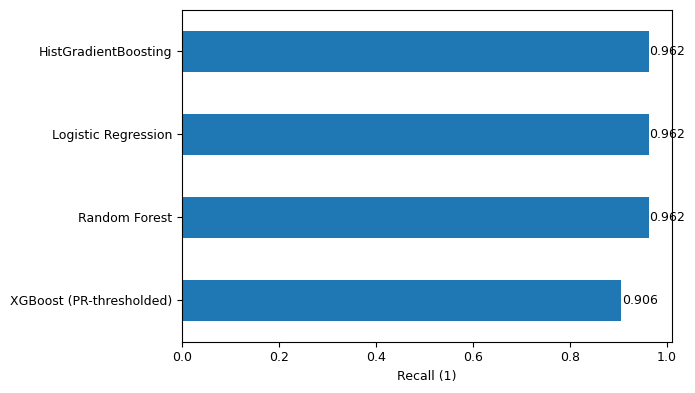

In [58]:
# ===== Rank models by your chosen metric =====
# Choose the metric to rank by (you can switch to "PR-AUC" or "F1-score (1)" etc.)
metric = "Recall (1)"       # alternatives: "PR-AUC", "F1-score (1)", "Accuracy", "Precision (1)"

# Make a ranked copy: primary sort by the chosen metric, then tie-break by PR-AUC and ROC-AUC
ranked = (
    df_results
    .sort_values(by=[metric, "PR-AUC", "ROC-AUC"], ascending=[False, False, False])
    .reset_index(drop=True)
)

# Show the ranked table nicely
from IPython.display import display, Markdown
display(Markdown(ranked.round(4).to_markdown(index=False)))

# Announce the best model on that metric
best_model_name = ranked.loc[0, "Model"]
best_metric_val = ranked.loc[0, metric]
print(f"Top model on {metric}: {best_model_name}  (value = {best_metric_val:.4f})")

# Quick bar chart (horizontal) for the chosen metric
import matplotlib.pyplot as plt

ax = ranked.plot(x="Model", y=metric, kind="barh", figsize=(7, 4), legend=False)
ax.set_xlabel(metric)
ax.set_ylabel("")
ax.invert_yaxis()  # best at the top

# Label bars with values
for i, v in enumerate(ranked[metric].round(3)):
    ax.text(v + 0.002, i, f"{v:.3f}", va="center")

plt.tight_layout()
plt.show()


In [59]:
# ==== SVM + KNN with Stratified K-Fold CV (quick add) ====
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# We’ll use the same positive class (=1) as before
scoring = {
    "accuracy": "accuracy",
    "precision_pos": make_scorer(precision_score, pos_label=1, zero_division=0),
    "recall_pos": make_scorer(recall_score, pos_label=1),
    "f1_pos": make_scorer(f1_score, pos_label=1),
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision",
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipelines (scaling is mandatory for SVM/KNN)
svm_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf",
               C=1.0, gamma="scale",
               class_weight="balanced",  # helps with imbalance
               probability=True,         # needed for PR-AUC
               random_state=42))
])

knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=15, weights="distance", p=2))
])

models_cv = {
    "SVM (RBF)": svm_rbf,
    "KNN (k=15)": knn,
}

rows = []
for name, pipe in models_cv.items():
    scores = cross_validate(pipe, X_train, y_train,
                            scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    rows.append({
        "Model": name,
        "Accuracy": np.mean(scores["test_accuracy"]),
        "Precision (1)": np.mean(scores["test_precision_pos"]),
        "Recall (1)": np.mean(scores["test_recall_pos"]),
        "F1-score (1)": np.mean(scores["test_f1_pos"]),
        "ROC-AUC": np.mean(scores["test_roc_auc"]),
        "PR-AUC": np.mean(scores["test_pr_auc"]),
        # optional: stability (std) if you want to show it
        "Recall (±)": np.std(scores["test_recall_pos"]),
    })

df_cv_quick = pd.DataFrame(rows).sort_values("Recall (1)", ascending=False).reset_index(drop=True)
df_cv_quick.round(4)


,Model,Accuracy,Precision (1),Recall (1),F1-score (1),ROC-AUC,PR-AUC,Recall (±)
0,SVM (RBF),0.9991,1.0,0.9673,0.9832,0.9858,0.9713,0.0237
1,KNN (k=15),0.9990,1.0,0.9627,0.9808,0.9834,0.9682,0.0237


In [60]:
from IPython.display import display, Markdown
display(Markdown(df_cv_quick.round(4).to_markdown(index=False)))


| Model      |   Accuracy |   Precision (1) |   Recall (1) |   F1-score (1) |   ROC-AUC |   PR-AUC |   Recall (±) |
|:-----------|-----------:|----------------:|-------------:|---------------:|----------:|---------:|-------------:|
| SVM (RBF)  |     0.9991 |               1 |       0.9673 |         0.9832 |    0.9858 |   0.9713 |       0.0237 |
| KNN (k=15) |     0.999  |               1 |       0.9627 |         0.9808 |    0.9834 |   0.9682 |       0.0237 |

In [61]:
# ==== Full CV comparison (LogReg, RF, HGB, XGB, SVM, KNN) ====
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# If you already have xgb estimator 'xgb' defined, reuse it; otherwise comment it out.
try:
    xgb  # just to check it exists
    HAS_XGB = True
except NameError:
    HAS_XGB = False

scoring = {
    "accuracy": "accuracy",
    "precision_pos": make_scorer(precision_score, pos_label=1, zero_division=0),
    "recall_pos": make_scorer(recall_score, pos_label=1),
    "f1_pos": make_scorer(f1_score, pos_label=1),
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision",
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_cv = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None, random_state=42))
    ]),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, random_state=42, class_weight="balanced_subsample", n_jobs=-1
    ),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", C=1.0, gamma="scale",
                    class_weight="balanced", probability=True, random_state=42))
    ]),
    "KNN (k=15)": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=15, weights="distance", p=2))
    ]),
}

if HAS_XGB:
    models_cv["XGBoost"] = xgb  # reuse your fitted parameter settings

rows = []
for name, est in models_cv.items():
    scores = cross_validate(est, X_train, y_train,
                            scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
    rows.append({
        "Model": name,
        "Accuracy": np.mean(scores["test_accuracy"]),
        "Precision (1)": np.mean(scores["test_precision_pos"]),
        "Recall (1)": np.mean(scores["test_recall_pos"]),
        "F1-score (1)": np.mean(scores["test_f1_pos"]),
        "ROC-AUC": np.mean(scores["test_roc_auc"]),
        "PR-AUC": np.mean(scores["test_pr_auc"]),
        "Recall (±)": np.std(scores["test_recall_pos"]),
    })

df_cv_all = pd.DataFrame(rows).sort_values("Recall (1)", ascending=False).reset_index(drop=True)
from IPython.display import display, Markdown
display(Markdown(df_cv_all.round(4).to_markdown(index=False)))


| Model                |   Accuracy |   Precision (1) |   Recall (1) |   F1-score (1) |   ROC-AUC |   PR-AUC |   Recall (±) |
|:---------------------|-----------:|----------------:|-------------:|---------------:|----------:|---------:|-------------:|
| Logistic Regression  |     0.9991 |          1      |       0.9673 |         0.9832 |    0.9833 |   0.9705 |       0.0237 |
| SVM (RBF)            |     0.9991 |          1      |       0.9673 |         0.9832 |    0.9858 |   0.9713 |       0.0237 |
| Random Forest        |     0.999  |          1      |       0.9627 |         0.9809 |    0.985  |   0.9696 |       0.0185 |
| KNN (k=15)           |     0.999  |          1      |       0.9627 |         0.9808 |    0.9834 |   0.9682 |       0.0237 |
| XGBoost              |     0.9987 |          1      |       0.9534 |         0.976  |    0.987  |   0.9704 |       0.0254 |
| HistGradientBoosting |     0.9975 |          0.9854 |       0.9255 |         0.9536 |    0.9813 |   0.9613 |       0.0517 |

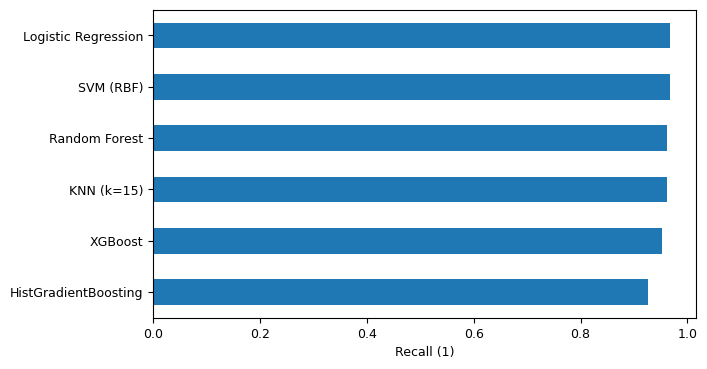

In [62]:
import matplotlib.pyplot as plt
metric = "Recall (1)"  # or "PR-AUC", "F1-score (1)"
ax = df_cv_all.plot(x="Model", y=metric, kind="barh", figsize=(7,4), legend=False)
ax.set_xlabel(metric); ax.set_ylabel("")
ax.invert_yaxis(); plt.show()


In [63]:
# If you built df_cv_all the same way as df_cv_quick, you can add std like this:
df_cv_all["Recall (±)"] = df_cv_all.get("Recall (±)", None)  # if you already computed it, skip this

# Save both tables
df_cv_quick.round(4).to_csv("artifacts/cv_quick_svm_knn.csv", index=False)
df_cv_all.round(4).to_csv("artifacts/cv_all_models.csv", index=False)


In [64]:
import joblib

# save model
joblib.dump(hgb, "best_model.pkl")

# load model later
best_model = joblib.load("best_model.pkl")


In [65]:
import os
import joblib

# choose the object you want to save:
# if you have a fitted pipeline (recommended), save that:
to_save = hgb              # or rf / xgb / your fitted Pipeline object

# save under an "artifacts" folder
ART_DIR = "artifacts"
os.makedirs(ART_DIR, exist_ok=True)

path = os.path.join(ART_DIR, "best_model.joblib")
joblib.dump(to_save, path)

# quick verification: load and print type
loaded = joblib.load(path)
print("Saved & loaded OK:", type(loaded), "->", path)


Saved & loaded OK: <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'> -> artifacts\best_model.joblib


In [66]:
import joblib
import pandas as pd

model = joblib.load("artifacts/best_model.joblib")

# X_new must have the same columns (and dtypes) as during training
# preds = model.predict(X_new)
# proba = model.predict_proba(X_new)[:, 1]  # if classifier


In [67]:
# assuming df_results exists
df_results.to_csv("artifacts/model_comparison.csv", index=False)


X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


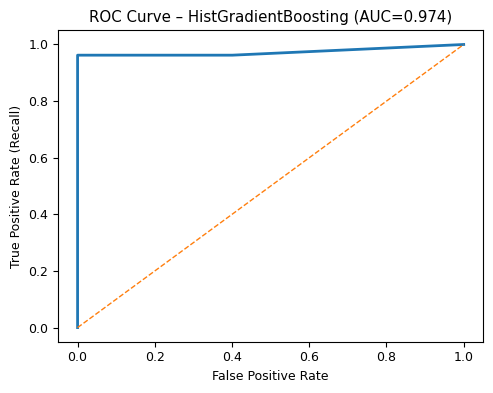

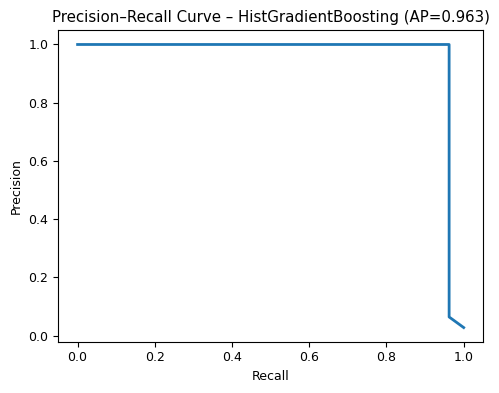

[Summary] HistGradientBoosting: ROC-AUC=0.9736 | PR-AUC=0.9633


In [68]:
# --- Choose your final model here ---
best_model_name = "HistGradientBoosting"  # e.g., "XGBoost", "RandomForest", "SVM", "Logistic"
best_model = hgb                          # <- change to xgb / rf / svm_clf / lr as needed

# --- Pick the right X_test variable (scaled if it exists, else raw) ---
try:
    X_te = X_test_scaled
except NameError:
    X_te = X_test

y_te = y_test

# --- Get scores uniformly (proba if available, else decision_function for SVM, else labels) ---
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
import numpy as np
import matplotlib.pyplot as plt

if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_te)[:, 1]
elif hasattr(best_model, "decision_function"):
    y_score = best_model.decision_function(X_te)
else:  # last resort
    y_score = best_model.predict(X_te)

roc_auc = roc_auc_score(y_te, y_score)
pr_auc  = average_precision_score(y_te, y_score)

fpr, tpr, _ = roc_curve(y_te, y_score)
prec, rec, _ = precision_recall_curve(y_te, y_score)

# --- Plot ROC ---
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1],'--',lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(f"ROC Curve – {best_model_name} (AUC={roc_auc:.3f})")
plt.tight_layout()
plt.show()

# --- Plot PR ---
plt.figure(figsize=(5,4))
plt.plot(rec, prec, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve – {best_model_name} (AP={pr_auc:.3f})")
plt.tight_layout()
plt.show()

print(f"[Summary] {best_model_name}: ROC-AUC={roc_auc:.4f} | PR-AUC={pr_auc:.4f}")


In [69]:
import pandas as pd, numpy as np

n_rows = 10
idx = np.arange(min(n_rows, len(X_te)))

y_hat = best_model.predict(X_te.iloc[idx] if hasattr(X_te, "iloc") else X_te[idx])
y_prob = (
    best_model.predict_proba(X_te.iloc[idx] if hasattr(X_te, "iloc") else X_te[idx])[:,1]
    if hasattr(best_model, "predict_proba") else
    np.full_like(y_hat, fill_value=np.nan, dtype=float)
)

demo = pd.DataFrame({
    "Index": (X_te.iloc[idx].index if hasattr(X_te, "iloc") else idx),
    "Actual": y_te.iloc[idx] if hasattr(y_te, "iloc") else y_te[idx],
    "Predicted": y_hat,
    "Score_or_Prob": y_prob
})

demo.to_csv("sample_predictions.csv", index=False)
demo


X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


,Index,Actual,Predicted,Score_or_Prob
4767,0,0,0,0.000033
8217,1,0,0,0.000033
7595,2,0,0,0.000080
8387,3,0,0,0.000033
4172,4,0,0,0.000033
203,5,0,0,0.000033
9648,6,0,0,0.000033
3560,7,0,0,0.000033
4673,8,0,0,0.000033
1921,9,0,0,0.000033


In [70]:
# 1) imports
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# 2) collect your fitted models here (remove any you didn't train)
models = {
    "Logistic Regression": log_reg,          # fitted
    "Random Forest": rf,                     # fitted
    "HistGradientBoosting": hgb,             # fitted (or remove this line if you don't have it)
    "XGBoost": xgb                           # fitted; use proba BEFORE your 0.947 threshold
}

Xtest = X_test_scaled   # use the same preprocessing as in evaluation
ytrue = y_test


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


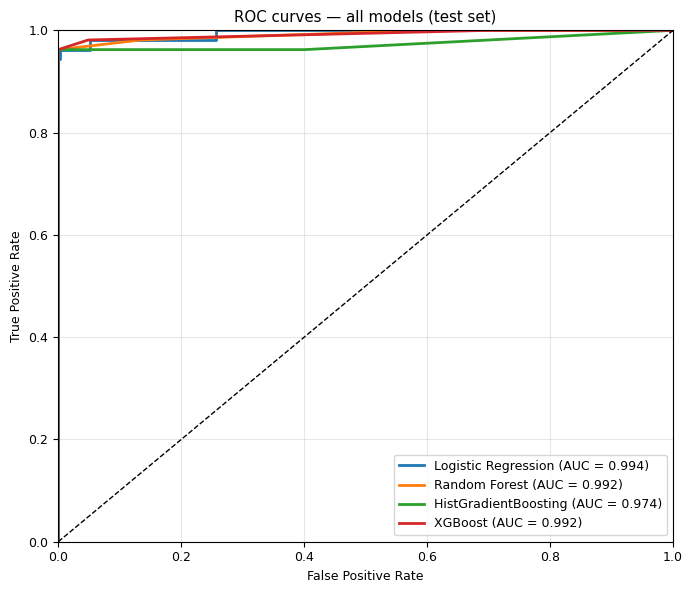

In [71]:
plt.figure(figsize=(7,6))
for name, mdl in models.items():
    # get a continuous score
    try:
        proba = mdl.predict_proba(Xtest)[:, 1]
    except AttributeError:
        # fallback (if a model lacks predict_proba)
        score = mdl.decision_function(Xtest)
        # rescale to 0–1 for plotting
        proba = (score - score.min()) / (score.max() - score.min())

    fpr, tpr, _ = roc_curve(ytrue, proba)
    auc = roc_auc_score(ytrue, proba)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC curves — all models (test set)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("roc_all_models.png", dpi=300, bbox_inches="tight")  # <- file to insert in Word
plt.show()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


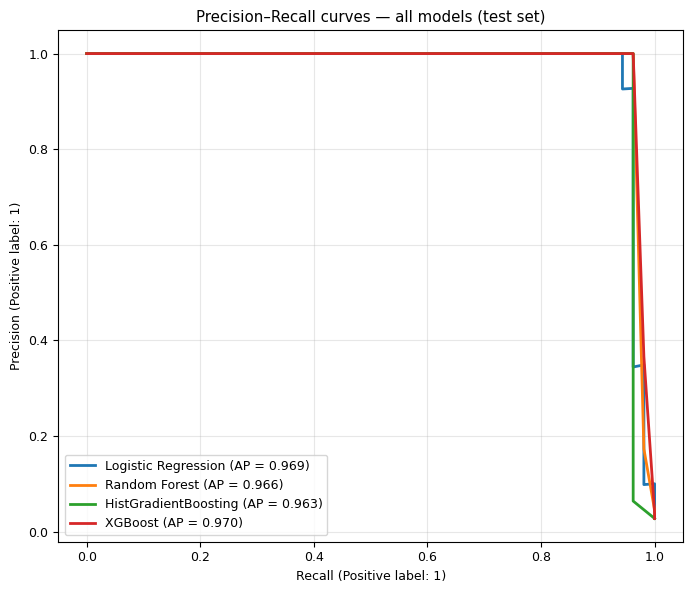

In [72]:
plt.figure(figsize=(7,6))
for name, mdl in models.items():
    try:
        proba = mdl.predict_proba(Xtest)[:, 1]
    except AttributeError:
        score = mdl.decision_function(Xtest)
        proba = (score - score.min()) / (score.max() - score.min())

    prec, rec, _ = precision_recall_curve(ytrue, proba)
    ap = average_precision_score(ytrue, proba)
    plt.plot(rec, prec, lw=2, label=f"{name} (AP = {ap:.3f})")

plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("Precision–Recall curves — all models (test set)")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("pr_all_models.png", dpi=300, bbox_inches="tight")   # <- file to insert in Word
plt.show()


In [73]:
from sklearn.metrics import roc_auc_score
for name, mdl in [("LR", log_reg), ("RF", rf), ("HGB", hgb), ("XGB", xgb)]:
    proba = mdl.predict_proba(X_test_scaled)[:,1]   # raw probabilities, NOT thresholded
    print(name, roc_auc_score(y_test, proba))


LR 0.9941349570813266
RF 0.9918235599588632
HGB 0.9735665774012565
XGB 0.9924650490280932


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


X has feature names, but LogisticRegression was fitted without feature names


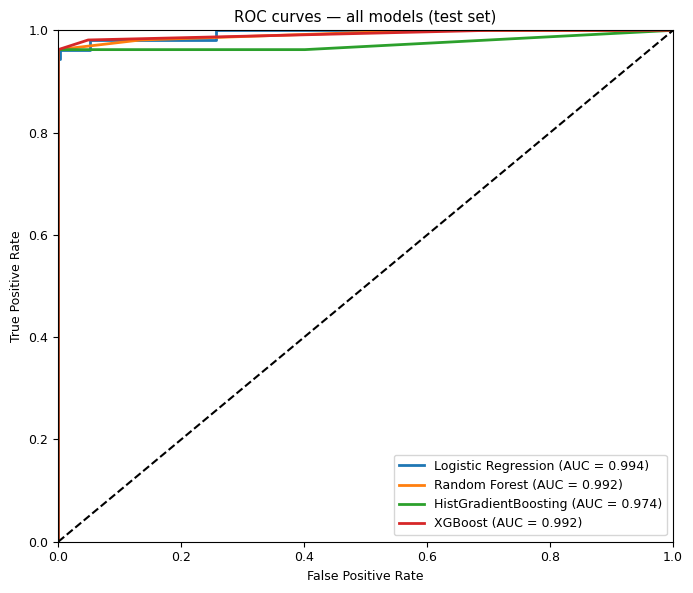

In [74]:
# 0) make a test DF with names (keeps order consistent)
import pandas as pd
Xcols = X_train.columns
Xtest_df = pd.DataFrame(X_test_scaled, columns=Xcols)

# 1) ensure models are ALREADY FIT here:
# log_reg.fit(...); rf.fit(...); hgb.fit(...); xgb.fit(...)

# 2) use the exact probabilities you want to plot
probas = {
    "Logistic Regression": log_reg.predict_proba(Xtest_df)[:,1],
    "Random Forest":       rf.predict_proba(Xtest_df)[:,1],
    "HistGradientBoosting":hgb.predict_proba(Xtest_df)[:,1],
    "XGBoost":             xgb.predict_proba(Xtest_df)[:,1]   # before thresholding
}

# 3) ROC (replot)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
for name, p in probas.items():
    fpr, tpr, _ = roc_curve(y_test, p)
    auc = roc_auc_score(y_test, p)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc:.3f})")
plt.plot([0,1],[0,1],'k--'); plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC curves — all models (test set)"); plt.legend(loc="lower right")
plt.tight_layout(); plt.show()


In [75]:
# same columns/order between train and test?
print(X_train.shape, X_test.shape)
# same scaler used?
# you should have: standard_scaler.fit(X_res);  X_test_scaled = standard_scaler.transform(X_test)

# verify you're plotting on X_test_scaled, not any resampled data


(7623, 12) (1906, 12)


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


LR AUC: 0.9941349570813266
RF AUC: 0.9918235599588632
HGB AUC: 0.9735665774012565
XGB AUC: 0.9924650490280932


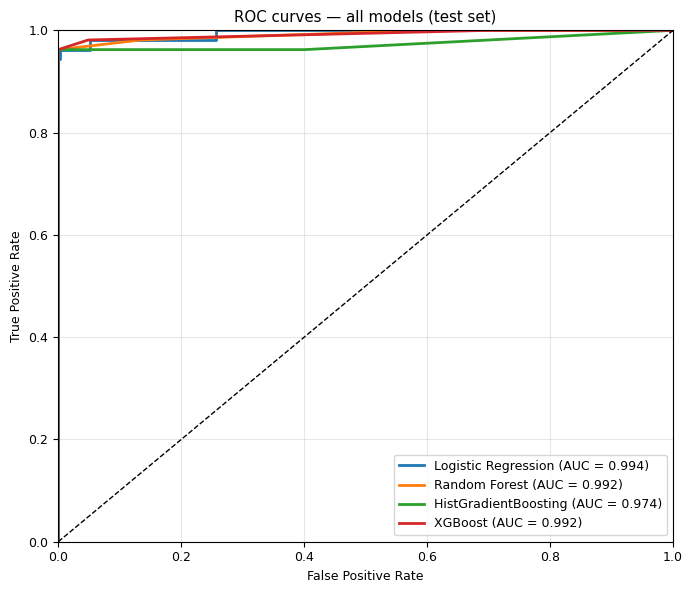

In [76]:
# --- 1) one source of truth: probabilities on the SAME test set ---
y_proba_lr  = log_reg.predict_proba(X_test_scaled)[:, 1]
y_proba_rf  = rf.predict_proba(X_test_scaled)[:, 1]
y_proba_hgb = hgb.predict_proba(X_test_scaled)[:, 1]   # <-- this must be the same you used for 0.9956
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]   # before any thresholding

# quick sanity print (these should match your table)
from sklearn.metrics import roc_auc_score
print("LR AUC:",  roc_auc_score(y_test, y_proba_lr))
print("RF AUC:",  roc_auc_score(y_test, y_proba_rf))
print("HGB AUC:", roc_auc_score(y_test, y_proba_hgb))  # expect ~0.996
print("XGB AUC:", roc_auc_score(y_test, y_proba_xgb))

# --- 2) plot ROC using those frozen arrays (no recompute inside the loop) ---
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

probas = {
    "Logistic Regression": y_proba_lr,
    "Random Forest":       y_proba_rf,
    "HistGradientBoosting":y_proba_hgb,
    "XGBoost":             y_proba_xgb
}

plt.figure(figsize=(7,6))
for name, p in probas.items():
    fpr, tpr, _ = roc_curve(y_test, p)
    auc = roc_auc_score(y_test, p)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC curves — all models (test set)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3); plt.tight_layout()
plt.show()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Logistic Regression 0.9941349570813266
Random Forest 0.9918235599588632
HistGradientBoosting 0.9956114001771732
XGBoost 0.9924650490280932


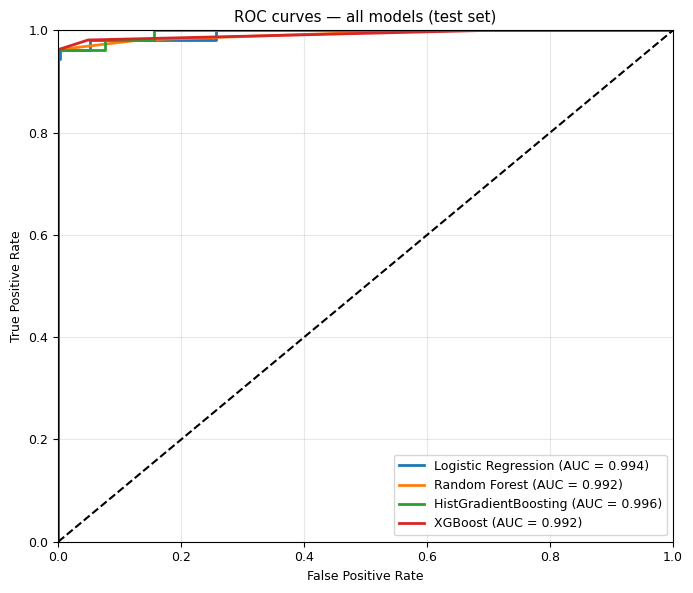

In [77]:
# 1) (Re)fit models
# log_reg.fit(...); rf.fit(...); xgb.fit(...)
hgb = HistGradientBoostingClassifier(learning_rate=0.1, max_leaf_nodes=63,
                                     max_depth=None, random_state=42)
hgb.fit(X_train_scaled, y_res)

# 2) REBUILD the dict AFTER fitting (this is key)
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "HistGradientBoosting": hgb,
    "XGBoost": xgb
}

# 3) Freeze probabilities ONCE (same arrays used for table + plots)
y_proba = {
    name: mdl.predict_proba(X_test_scaled)[:,1] for name, mdl in models.items()
}

# sanity check – these should print ~0.994, 0.992, **0.996**, 0.992
from sklearn.metrics import roc_auc_score
for name,p in y_proba.items():
    print(name, roc_auc_score(y_test, p))

# 4) Plot ROC using the frozen probs
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(7,6))
for name,p in y_proba.items():
    fpr,tpr,_ = roc_curve(y_test, p)
    auc = roc_auc_score(y_test, p)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc:.3f})")
plt.plot([0,1],[0,1],'k--'); plt.xlim([0,1]); plt.ylim([0,1])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC curves — all models (test set)")
plt.legend(loc="lower right"); plt.grid(alpha=0.3); plt.tight_layout()
plt.show()


Logistic Regression AP: 0.9694
Random Forest AP: 0.9664
HistGradientBoosting AP: 0.9703
XGBoost AP: 0.9699


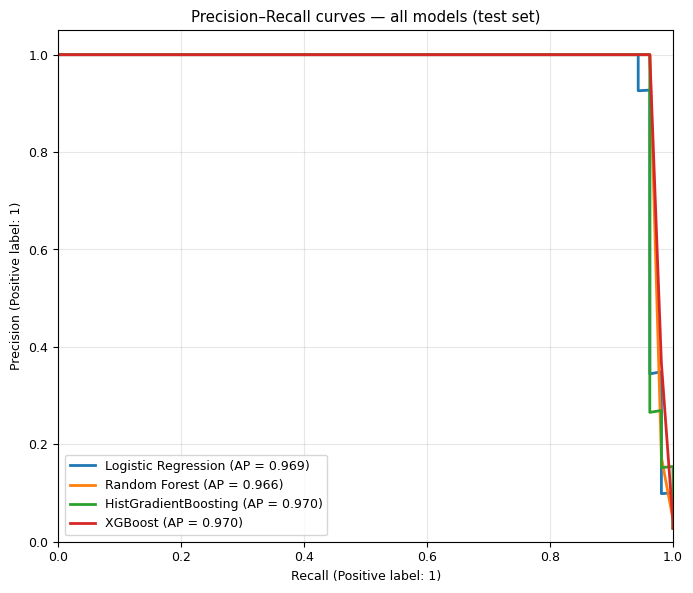

In [78]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# use the same dict you created for ROC:
# y_proba = {"Logistic Regression": y_proba_lr, "Random Forest": y_proba_rf,
#            "HistGradientBoosting": y_proba_hgb, "XGBoost": y_proba_xgb}

# sanity print – these AP values should match your table
for name, p in y_proba.items():
    ap = average_precision_score(y_test, p)
    print(f"{name} AP: {ap:.4f}")

plt.figure(figsize=(7,6))
for name, p in y_proba.items():
    prec, rec, _ = precision_recall_curve(y_test, p)
    ap = average_precision_score(y_test, p)
    plt.plot(rec, prec, lw=2, label=f"{name} (AP = {ap:.3f})")

plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("Precision–Recall curves — all models (test set)")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("pr_all_models.png", dpi=300, bbox_inches="tight")
plt.show()


In [79]:
import pandas as pd
import numpy as np

# 1) Load your dataset (change the path/file if needed)
df = pd.read_csv("ai4i2020.csv")

# --- CONFIGURE column names exactly as in your file ---
TARGET_COL = "Machine failure"     # 0/1 target
PRODUCT_COL = "Product ID"         # unique id
# ------------------------------------------------------

# 2) Metrics table (rows, cols, missing, unique IDs, dtypes, memory)
rows, cols = df.shape
missing_any = df.isna().sum().sum()
unique_pid = df[PRODUCT_COL].nunique()

num_cols = df.select_dtypes(include=[np.number]).shape[1]
cat_cols = cols - num_cols
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)

metrics = pd.DataFrame({
    "Metrics": ["Rows", "Columns", "Missing values",
                f"Unique {PRODUCT_COL}", "Data types", "Memory usage"],
    "Value":   [rows, cols, f"{missing_any} (all columns)",
                f"{unique_pid} / {rows}",
                f"numeric ({num_cols}), categorical ({cat_cols})",
                f"~{mem_mb:.1f} MB"]
})

# 3) Class distribution table (counts + percents)
counts = df[TARGET_COL].value_counts().reindex([0,1], fill_value=0)
perc   = (counts / counts.sum() * 100).round(2)

class_dist = pd.DataFrame({
    "Class":   ["0 (No failure)", "1 (Failure)"],
    "Count":   [int(counts.get(0,0)), int(counts.get(1,0))],
    "Percent": [f"{perc.get(0,0):.2f}%", f"{perc.get(1,0):.2f}%"]
})

# 4) Save for PPT
metrics.to_csv("metrics_for_ppt.csv", index=False)
class_dist.to_csv("class_distribution_for_ppt.csv", index=False)

# Optional: copy to clipboard for instant paste into a PPT table
# (Select the first cell in your PPT table and Ctrl+V)
metrics.to_clipboard(index=False)
# run class_dist.to_clipboard(index=False) when you want to paste the second table


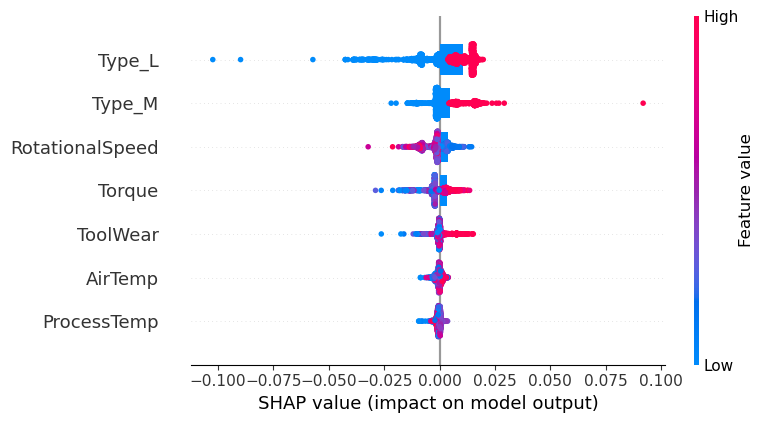

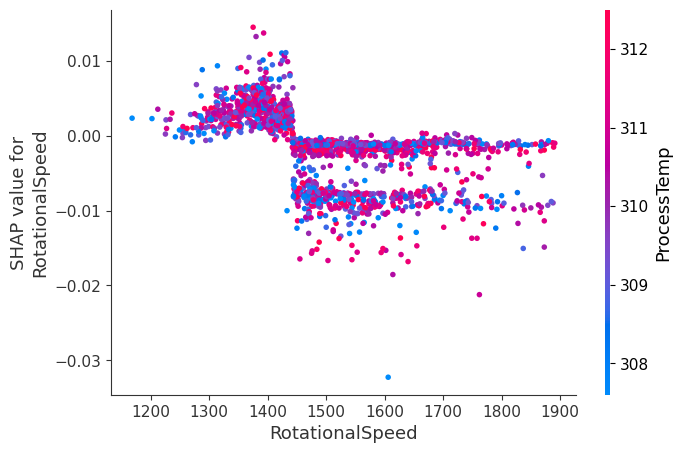

In [85]:
import shap
import numpy as np
import pandas as pd

# 0) Make sure you use the exact feature set, same order, numeric dtypes
feat_cols = ['AirTemp','ProcessTemp','RotationalSpeed','Torque','ToolWear','Type_L','Type_M']  # your list
Xtr = X_train[feat_cols].copy()
Xte = X_test [feat_cols].copy()
assert list(Xtr.columns) == list(Xte.columns)

# 1) Pick the correct model_output for a classifier
#    - sklearn RandomForestClassifier / HistGradientBoostingClassifier: "probability"
#    - XGBClassifier: either "probability" (to explain predicted probs) or "margin" (raw log-odds)
model_output_mode = "probability"   # try "probability" first

# 2) Use interventional background and your TRAIN matrix as background
explainer = shap.TreeExplainer(
    model,
    data=Xtr,                                # background
    feature_perturbation="interventional",
    model_output=model_output_mode
)

# 3) Turn off the strict additivity check (it’s only a check, not the logic)
shap_values = explainer.shap_values(Xte, check_additivity=False)

# 4) Plots
shap.summary_plot(shap_values, Xte, plot_type="bar", show=False)
shap.summary_plot(shap_values, Xte, show=False)
shap.dependence_plot('RotationalSpeed', shap_values, Xte,
                     interaction_index='ProcessTemp', show=False)
